In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
import csv
import itertools
import operator
import numpy as np
import nltk
import sys
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import requests
from bs4 import BeautifulSoup

# The URL of the Gutenberg book
book_url = "https://www.gutenberg.org/cache/epub/33525/pg33525.txt"

# Download the text from the URL
response = requests.get(book_url)

# Save the book content to a file
with open("./short_stories_tagore.txt", "w", encoding='utf-8') as file:
    file.write(response.text)

print("Book downloaded successfully!")

# Now, when reading the file, specify the encoding explicitly to avoid errors
with open("./short_stories_tagore.txt", "r", encoding='utf-8') as file:
    content = file.read()

# Display the first 500 characters of the book for analysis
print("Before cleaning:\n")
print(content[:500])

# Step 1: Find the start and end of the actual content of the book
# Manually look at the text or use the first few lines to identify where the content starts and ends.

# Remove everything before the start of the book
start_marker = "I\n\nTHE CABULIWALLAH"
end_marker = "End of the Project Gutenberg"

# Find the positions of these markers in the text
start_pos = content.find(start_marker)
end_pos = content.find(end_marker)

# Step 2: Slice the text to only include the content between these markers
cleaned_content = content[start_pos:end_pos]

# Display the first 500 characters of the cleaned book
print("\nAfter cleaning:\n")
print(cleaned_content[:500])

# Save the cleaned content to a new file
with open("stories_from_tagore_cleaned.txt", "w", encoding='utf-8') as file:
    file.write(cleaned_content)

print("Cleaned book saved successfully!")


Book downloaded successfully!
Before cleaning:

﻿The Project Gutenberg eBook of Stories from Tagore
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.


After cleaning:

I

THE CABULIWALLAH


My five years' old daughter Mini cannot live without chattering. I
really believe that in all her life she has not wasted a minute in
silence. Her mother is often vexed at this, and would stop her prattle,
but I would not. To see Mini quiet is unnatural, and I cannot bear it
long. And so my own talk with her is always lively.

One morning, for instance, when I was in the midst of the seventeenth
chapter of m

In [4]:
cleaned_content[:30]

'I\n\nTHE CABULIWALLAH\n\n\nMy five '

In [5]:
import re

In [6]:
def remove_chapter_titles(text):
    pattern = r'^(M{0,3})(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})\s*\n+([A-Z\s-]+)\s*\n+'

    cleaned_text = re.sub(pattern, '', text, flags=re.MULTILINE)

    return cleaned_text

In [7]:
cleaned_content_chapter_titles_removed = remove_chapter_titles(cleaned_content)

with open('./tagore_chapter_titles_removed.txt', "w", encoding='utf-8') as file:
    file.write(cleaned_content_chapter_titles_removed)

In [8]:
from nltk import tokenize


unknown_token = "UNKNOWN_TOKEN"
sentence_start_token = "SENTENCE_START"
sentence_end_token = "SENTENCE_END"


text = ''
print( "Reading txt file...")
with open(r'tagore_chapter_titles_removed_edited.txt', 'r') as f:
    text = f.read()

text = text.replace(",","")
text = text.replace(":","")
text = text.replace(";","")
text = text.replace("’","")
text = text.replace("?\n",".\n")
text = text.replace("!\n",".\n")
text = text.replace("?","")
text = text.replace("!","")
text = text.replace("\'","")
text = text.replace('"', "")

_RE_COMBINE_WHITESPACE = re.compile(r"\s+")
text = _RE_COMBINE_WHITESPACE.sub(" ", text).strip()

text[:500]

Reading txt file...


'My five years old daughter Mini cannot live without chattering. I really believe that in all her life she has not wasted a minute in silence. Her mother is often vexed at this and would stop her prattle but I would not. To see Mini quiet is unnatural and I cannot bear it long. And so my own talk with her is always lively. One morning for instance when I was in the midst of the seventeenth chapter of my new novel my little Mini stole into the room and putting her hand into mine said Father Ramday'

In [9]:
sentences = tokenize.sent_tokenize(text)
for i in range(0, 10):
    print(sentences[i])
    print()

My five years old daughter Mini cannot live without chattering.

I really believe that in all her life she has not wasted a minute in silence.

Her mother is often vexed at this and would stop her prattle but I would not.

To see Mini quiet is unnatural and I cannot bear it long.

And so my own talk with her is always lively.

One morning for instance when I was in the midst of the seventeenth chapter of my new novel my little Mini stole into the room and putting her hand into mine said Father Ramdayal the door-keeper calls a crow a krow He doesnt know anything does he Before I could explain to her the differences of language in this world she was embarked on the full tide of another subject.

What do you think Father Bhola says there is an elephant in the clouds blowing water out of his trunk and that is why it rains And then darting off anew while I sat still making ready some reply to this last saying Father what relation is Mother to you With a grave face I contrived to say Go and 

In [10]:
sentences[0]

'My five years old daughter Mini cannot live without chattering.'

In [11]:
print(len(text)) # this is length of total characters in the cleaned file

210438


In [12]:
from collections import Counter

words = text.split()

print(len(words)) # total words count

39073


In [13]:
unique_words = set(words) # unique words
len(unique_words)

6122

In [14]:
word_count = Counter(words)
print(len(word_count.keys()))

6122


In [15]:
vocabulary_size = len(word_count.keys())

In [16]:
sentence_start_token, sentence_end_token

('SENTENCE_START', 'SENTENCE_END')

In [17]:
sentences[0]

'My five years old daughter Mini cannot live without chattering.'

In [18]:
sentences[0][:-1] # removing the full stop at the end

'My five years old daughter Mini cannot live without chattering'

In [19]:
def attach_sentence_start_and_end_token(sentences):
    sentences = ["%s %s %s" % (sentence_start_token, x[:-1], sentence_end_token) for x in sentences]
    return sentences

In [20]:
# attach_sentence_start_and_end_token(sentences)

In [21]:
# sentences

In [22]:
def tokenize_the_sentences_into_words(sentences):
    tokenized = [nltk.word_tokenize(sent.replace('.', '')) for sent in sentences]
    return tokenized

In [23]:
sentences_with_token = attach_sentence_start_and_end_token(sentences)
# sentences_with_token

In [24]:
sentences_tokenized_words = tokenize_the_sentences_into_words(sentences_with_token)
# sentences_tokenized_words

In [25]:
print(  "Parsed %d sentences." % (len(sentences_with_token)))

Parsed 2065 sentences.


In [26]:
word_freq = nltk.FreqDist(itertools.chain(*sentences_tokenized_words))
print(  "Found %d unique words tokens." % len(word_freq.items()))

Found 5242 unique words tokens.


In [27]:
vocab = word_freq.most_common(vocabulary_size-1)
index_to_word = [x[0] for x in vocab]
index_to_word.append(unknown_token)
word_to_index = dict([(w,i) for i,w in enumerate(index_to_word)])
print("The least frequent word in our vocabulary is '%s' and appeared %d times." % (vocab[-1][0], vocab[-1][1]))

The least frequent word in our vocabulary is 'belongs' and appeared 1 times.


In [28]:
vocabulary_size = len(word_freq.items())
print("Using vocabulary size %d." % vocabulary_size)

print(  "\nExample sentence: '%s'" % sentences_with_token[0])
print(  "\nExample sentence after Pre-processing: '%s'" % sentences_tokenized_words[0])

Using vocabulary size 5242.

Example sentence: 'SENTENCE_START My five years old daughter Mini cannot live without chattering SENTENCE_END'

Example sentence after Pre-processing: '['SENTENCE_START', 'My', 'five', 'years', 'old', 'daughter', 'Mini', 'can', 'not', 'live', 'without', 'chattering', 'SENTENCE_END']'


In [29]:
vocab[0:20]

[('SENTENCE_START', 2065),
 ('SENTENCE_END', 2065),
 ('the', 2041),
 ('to', 1199),
 ('and', 1193),
 ('of', 1044),
 ('his', 883),
 ('a', 797),
 ('was', 708),
 ('in', 608),
 ('he', 583),
 ('that', 470),
 ('had', 466),
 ('with', 401),
 ('him', 378),
 ('her', 361),
 ('I', 314),
 ('it', 296),
 ('for', 274),
 ('would', 266)]

In [30]:
sentences_with_token[0:5]

['SENTENCE_START My five years old daughter Mini cannot live without chattering SENTENCE_END',
 'SENTENCE_START I really believe that in all her life she has not wasted a minute in silence SENTENCE_END',
 'SENTENCE_START Her mother is often vexed at this and would stop her prattle but I would not SENTENCE_END',
 'SENTENCE_START To see Mini quiet is unnatural and I cannot bear it long SENTENCE_END',
 'SENTENCE_START And so my own talk with her is always lively SENTENCE_END']

In [31]:
%%time
from collections import Counter
from nltk import ngrams
bigram_counts = Counter(ngrams(text.split(), 2))
bigram_counts.most_common(10)

CPU times: user 15.8 ms, sys: 7.96 ms, total: 23.8 ms
Wall time: 34.3 ms


[(('of', 'the'), 253),
 (('in', 'the'), 185),
 (('of', 'his'), 113),
 (('to', 'the'), 103),
 (('he', 'had'), 87),
 (('on', 'the'), 82),
 (('and', 'the'), 81),
 (('to', 'his'), 71),
 (('that', 'he'), 68),
 (('in', 'his'), 61)]

In [32]:
trigram_counts = Counter(ngrams(text.split(), 3))
trigram_counts.most_common(10)

[(('that', 'he', 'had'), 18),
 (('for', 'him', 'to'), 15),
 (('there', 'was', 'a'), 14),
 (('that', 'he', 'was'), 14),
 (('there', 'was', 'no'), 14),
 (('that', 'there', 'was'), 12),
 (('of', 'his', 'own'), 10),
 (('that', 'he', 'would'), 10),
 (('and', 'began', 'to'), 10),
 (('he', 'could', 'not'), 9)]

In [33]:
quadgram_counts = Counter(ngrams(text.replace('&', 'i').split(), 4))
quadgram_counts.most_common(10)

[(('palace', 'with', 'the', 'seven'), 6),
 (('the', 'Chota', 'LAct', 'Sahib'), 6),
 (('in', 'the', 'palace', 'with'), 5),
 (('the', 'palace', 'with', 'the'), 5),
 (('there', 'was', 'no', 'one'), 5),
 (('heaved', 'a', 'deep', 'sigh'), 4),
 (('and', 'sat', 'down', 'on'), 4),
 (('sat', 'down', 'on', 'the'), 4),
 (('the', 'end', 'of', 'the'), 4),
 (('I', 'will', 'tell', 'you'), 4)]

In [34]:
pentagram_counts = Counter(ngrams(text.split(), 5))
pentagram_counts.most_common(10)

[(('in', 'the', 'palace', 'with', 'the'), 5),
 (('the', 'palace', 'with', 'the', 'seven'), 5),
 (('and', 'sat', 'down', 'on', 'the'), 4),
 (('made', 'up', 'his', 'mind', 'to'), 3),
 (('heaved', 'a', 'deep', 'sigh', 'and'), 3),
 (('palace', 'with', 'the', 'seven', 'wings'), 3),
 (('palace', 'with', 'the', 'seven', 'wings.'), 3),
 (('there', 'was', 'no', 'one', 'there.'), 3),
 (('asked', 'him', 'if', 'he', 'had'), 3),
 (('on', 'the', 'floor', 'of', 'the'), 3)]

In [35]:
hexagram_counts = Counter(ngrams(text.split(), 6))
hexagram_counts.most_common(10)

[(('in', 'the', 'palace', 'with', 'the', 'seven'), 5),
 (('the', 'palace', 'with', 'the', 'seven', 'wings'), 3),
 (('about', 'the', 'theft', 'of', 'the', 'will'), 3),
 (('you', 'going', 'to', 'the', 'father-in-laws', 'house'), 2),
 (('Phatik', 'my', 'darling', 'my', 'darling.', 'Phatik'), 2),
 (('Grannie', 'do', 'tell', 'me', 'a', 'story.'), 2),
 (('do', 'tell', 'me', 'a', 'story.', 'I'), 2),
 (('him', 'Who', 'is', 'that', 'beautiful', 'lady'), 2),
 (('is', 'that', 'beautiful', 'lady', 'in', 'the'), 2),
 (('that', 'beautiful', 'lady', 'in', 'the', 'palace'), 2)]

In [36]:
heptagram_counts = Counter(ngrams(text.split(), 7))
heptagram_counts.most_common(10)

[(('in', 'the', 'palace', 'with', 'the', 'seven', 'wings'), 3),
 (('Grannie', 'do', 'tell', 'me', 'a', 'story.', 'I'), 2),
 (('is', 'that', 'beautiful', 'lady', 'in', 'the', 'palace'), 2),
 (('that', 'beautiful', 'lady', 'in', 'the', 'palace', 'with'), 2),
 (('beautiful', 'lady', 'in', 'the', 'palace', 'with', 'the'), 2),
 (('lady', 'in', 'the', 'palace', 'with', 'the', 'seven'), 2),
 (('Let', 'it', 'pass', 'to-day.', 'I', 'will', 'tell'), 2),
 (('it', 'pass', 'to-day.', 'I', 'will', 'tell', 'you'), 2),
 (('pass', 'to-day.', 'I', 'will', 'tell', 'you', 'some'), 2),
 (('to-day.', 'I', 'will', 'tell', 'you', 'some', 'other'), 2)]

In [37]:
octagram_counts = Counter(ngrams(text.split(), 8))
octagram_counts.most_common(10)

[(('is', 'that', 'beautiful', 'lady', 'in', 'the', 'palace', 'with'), 2),
 (('that', 'beautiful', 'lady', 'in', 'the', 'palace', 'with', 'the'), 2),
 (('beautiful', 'lady', 'in', 'the', 'palace', 'with', 'the', 'seven'), 2),
 (('lady', 'in', 'the', 'palace', 'with', 'the', 'seven', 'wings'), 2),
 (('Let', 'it', 'pass', 'to-day.', 'I', 'will', 'tell', 'you'), 2),
 (('it', 'pass', 'to-day.', 'I', 'will', 'tell', 'you', 'some'), 2),
 (('pass', 'to-day.', 'I', 'will', 'tell', 'you', 'some', 'other'), 2),
 (('to-day.', 'I', 'will', 'tell', 'you', 'some', 'other', 'day.'), 2),
 (('began', 'to', 'count', 'the', 'hours', 'in', 'expectation', 'of'), 2),
 (('to', 'count', 'the', 'hours', 'in', 'expectation', 'of', 'the'), 2)]

In [38]:
eneagram_counts = Counter(ngrams(text.split(), 9))
eneagram_counts.most_common(10)

[(('is', 'that', 'beautiful', 'lady', 'in', 'the', 'palace', 'with', 'the'),
  2),
 (('that', 'beautiful', 'lady', 'in', 'the', 'palace', 'with', 'the', 'seven'),
  2),
 (('beautiful',
   'lady',
   'in',
   'the',
   'palace',
   'with',
   'the',
   'seven',
   'wings'),
  2),
 (('Let', 'it', 'pass', 'to-day.', 'I', 'will', 'tell', 'you', 'some'), 2),
 (('it', 'pass', 'to-day.', 'I', 'will', 'tell', 'you', 'some', 'other'), 2),
 (('pass', 'to-day.', 'I', 'will', 'tell', 'you', 'some', 'other', 'day.'), 2),
 (('began', 'to', 'count', 'the', 'hours', 'in', 'expectation', 'of', 'the'),
  2),
 (('to', 'count', 'the', 'hours', 'in', 'expectation', 'of', 'the', 'night.'),
  2),
 (('Twice-born',
   'bird',
   'ah',
   'wherefore',
   'stirred',
   'To',
   'wrong',
   'our',
   'royal'),
  2),
 (('bird',
   'ah',
   'wherefore',
   'stirred',
   'To',
   'wrong',
   'our',
   'royal',
   'lady.'),
  2)]

In [39]:
decagram_counts = Counter(ngrams(text.split(), 10))
decagram_counts.most_common(10)

[(('is',
   'that',
   'beautiful',
   'lady',
   'in',
   'the',
   'palace',
   'with',
   'the',
   'seven'),
  2),
 (('that',
   'beautiful',
   'lady',
   'in',
   'the',
   'palace',
   'with',
   'the',
   'seven',
   'wings'),
  2),
 (('Let',
   'it',
   'pass',
   'to-day.',
   'I',
   'will',
   'tell',
   'you',
   'some',
   'other'),
  2),
 (('it',
   'pass',
   'to-day.',
   'I',
   'will',
   'tell',
   'you',
   'some',
   'other',
   'day.'),
  2),
 (('began',
   'to',
   'count',
   'the',
   'hours',
   'in',
   'expectation',
   'of',
   'the',
   'night.'),
  2),
 (('Twice-born',
   'bird',
   'ah',
   'wherefore',
   'stirred',
   'To',
   'wrong',
   'our',
   'royal',
   'lady.'),
  2),
 (('My',
   'five',
   'years',
   'old',
   'daughter',
   'Mini',
   'cannot',
   'live',
   'without',
   'chattering.'),
  1),
 (('five',
   'years',
   'old',
   'daughter',
   'Mini',
   'cannot',
   'live',
   'without',
   'chattering.',
   'I'),
  1),
 (('years',
   'old

In [40]:
re.findall('\..[^" "]*', text[8000:9000])

['. Even', '. One', '. It', '. Through', '. It', '. All', '. There']

In [41]:
first_word_counts = Counter([ p.replace('. ', '') for p in re.findall('\..[^" "]*', text)])
first_word_counts.most_common(10)

[('The', 222),
 ('He', 206),
 ('But', 127),
 ('It', 80),
 ('I', 79),
 ('When', 72),
 ('She', 59),
 ('And', 50),
 ('His', 44),
 ('Haralal', 40)]

In [42]:
len(first_word_counts)

265

In [43]:
X_train = [[sentence_start_token]*c for sent,c in first_word_counts.items() if sent != 'o.']
y_train = [[sent]*c for sent,c in first_word_counts.items() if sent != 'o.']

In [44]:
X_train = [item for sublist in X_train for item in sublist]
y_train = [item for sublist in y_train for item in sublist]

In [45]:
X_train[:10]

['SENTENCE_START',
 'SENTENCE_START',
 'SENTENCE_START',
 'SENTENCE_START',
 'SENTENCE_START',
 'SENTENCE_START',
 'SENTENCE_START',
 'SENTENCE_START',
 'SENTENCE_START',
 'SENTENCE_START']

In [46]:
y_train[:10]

['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I']

In [47]:
len(X_train), len(y_train)

(2069, 2069)

In [48]:
import random

def fisher_yates (arr1, arr2):

    # We will Start from the last element
    # and swap one by one.
    n = len(arr1)
    if n != len(arr2):
        return None

    for i in range(n - 1, 0, -1):

        # Pick a random index from 0 to i
        j = random.randint(0, i)
        #print(i, j)

        # Swap arr[i] with the element at random index
        arr1[i], arr1[j] = arr1[j], arr1[i]
        arr2[i], arr2[j] = arr2[j], arr2[i]

    return arr1, arr2

In [49]:
X_train, y_train = fisher_yates(X_train, y_train)
len(X_train), len(y_train)

(2069, 2069)

In [50]:
y_train[:9]

['The', 'Ratan', 'She', 'Every', 'The', 'Rashmani', 'The', 'Dont', 'how']

In [51]:
X_tokens = [[word_to_index[symbol]] for symbol,word in zip(X_train, y_train) if word in word_to_index]
y_tokens = [[word_to_index[word]] for symbol,word in zip(X_train, y_train) if word in word_to_index]

In [52]:
X_train = X_tokens
y_train = y_tokens

In [53]:
len(X_train), len(y_train)

(2060, 2060)

In [54]:
X_train[0:5], y_train[0:5]

([[0], [0], [0], [0], [0]], [[21], [214], [90], [492], [21]])

In [55]:
# n-grams upto 20

In [56]:
ngrams_up_to_20 = []
for i in range(2, 21):
    ngram_counts = Counter(ngrams(text.split(), i))
    print('ngram-', i, 'length:', len(ngram_counts))
    ngrams_up_to_20.append(ngram_counts)

ngram- 2 length: 25264
ngram- 3 length: 36340
ngram- 4 length: 38572
ngram- 5 length: 38936
ngram- 6 length: 39015
ngram- 7 length: 39039
ngram- 8 length: 39049
ngram- 9 length: 39054
ngram- 10 length: 39058
ngram- 11 length: 39061
ngram- 12 length: 39062
ngram- 13 length: 39061
ngram- 14 length: 39060
ngram- 15 length: 39059
ngram- 16 length: 39058
ngram- 17 length: 39057
ngram- 18 length: 39056
ngram- 19 length: 39055
ngram- 20 length: 39054


In [57]:
ngrams_up_to_20[0].most_common(10)

[(('of', 'the'), 253),
 (('in', 'the'), 185),
 (('of', 'his'), 113),
 (('to', 'the'), 103),
 (('he', 'had'), 87),
 (('on', 'the'), 82),
 (('and', 'the'), 81),
 (('to', 'his'), 71),
 (('that', 'he'), 68),
 (('in', 'his'), 61)]

In [58]:
ngrams_up_to_20[1].most_common(10)

[(('that', 'he', 'had'), 18),
 (('for', 'him', 'to'), 15),
 (('there', 'was', 'a'), 14),
 (('that', 'he', 'was'), 14),
 (('there', 'was', 'no'), 14),
 (('that', 'there', 'was'), 12),
 (('of', 'his', 'own'), 10),
 (('that', 'he', 'would'), 10),
 (('and', 'began', 'to'), 10),
 (('he', 'could', 'not'), 9)]

In [59]:
ngrams_up_to_20[2].most_common(10)

[(('palace', 'with', 'the', 'seven'), 6),
 (('the', 'Chota', 'LAct', 'Sahib'), 6),
 (('in', 'the', 'palace', 'with'), 5),
 (('the', 'palace', 'with', 'the'), 5),
 (('there', 'was', 'no', 'one'), 5),
 (('heaved', 'a', 'deep', 'sigh'), 4),
 (('and', 'sat', 'down', 'on'), 4),
 (('sat', 'down', 'on', 'the'), 4),
 (('the', 'end', 'of', 'the'), 4),
 (('I', 'will', 'tell', 'you'), 4)]

In [60]:
bigrams_to_learn = bigram_counts.most_common(100)
bigrams_to_learn[0][0], bigrams_to_learn[0][0][0], bigrams_to_learn[0][0][1]

(('of', 'the'), 'of', 'the')

In [61]:
def remove_periods(ngram):
    for wrd in ngram[0]:
        if '.' in wrd or "’" in wrd or "‘" in wrd:
            return False
    return True

def my_filter(ngrams):
    return filter(remove_periods, ngrams)

In [62]:
len(ngrams_up_to_20[0].most_common()), ngrams_up_to_20[0].most_common()

(25264,
 [(('of', 'the'), 253),
  (('in', 'the'), 185),
  (('of', 'his'), 113),
  (('to', 'the'), 103),
  (('he', 'had'), 87),
  (('on', 'the'), 82),
  (('and', 'the'), 81),
  (('to', 'his'), 71),
  (('that', 'he'), 68),
  (('in', 'his'), 61),
  (('he', 'would'), 61),
  (('had', 'been'), 60),
  (('to', 'be'), 60),
  (('at', 'the'), 57),
  (('he', 'was'), 57),
  (('his', 'own'), 57),
  (('It', 'was'), 54),
  (('with', 'the'), 53),
  (('in', 'a'), 51),
  (('of', 'a'), 49),
  (('it', 'was'), 48),
  (('from', 'the'), 48),
  (('was', 'a'), 47),
  (('there', 'was'), 46),
  (('did', 'not'), 46),
  (('with', 'a'), 43),
  (('and', 'said'), 43),
  (('him', 'to'), 43),
  (('could', 'not'), 40),
  (('was', 'the'), 39),
  (('that', 'the'), 39),
  (('all', 'the'), 39),
  (('for', 'a'), 36),
  (('and', 'his'), 35),
  (('and', 'he'), 34),
  (('with', 'his'), 34),
  (('used', 'to'), 34),
  (('his', 'mother'), 34),
  (('was', 'not'), 32),
  (('would', 'be'), 32),
  (('to', 'him'), 32),
  (('into', 'the'

In [63]:
l = list(filter(lambda x: 1 < int(x[1]), ngrams_up_to_20[0].most_common()))
len(l), l

(4391,
 [(('of', 'the'), 253),
  (('in', 'the'), 185),
  (('of', 'his'), 113),
  (('to', 'the'), 103),
  (('he', 'had'), 87),
  (('on', 'the'), 82),
  (('and', 'the'), 81),
  (('to', 'his'), 71),
  (('that', 'he'), 68),
  (('in', 'his'), 61),
  (('he', 'would'), 61),
  (('had', 'been'), 60),
  (('to', 'be'), 60),
  (('at', 'the'), 57),
  (('he', 'was'), 57),
  (('his', 'own'), 57),
  (('It', 'was'), 54),
  (('with', 'the'), 53),
  (('in', 'a'), 51),
  (('of', 'a'), 49),
  (('it', 'was'), 48),
  (('from', 'the'), 48),
  (('was', 'a'), 47),
  (('there', 'was'), 46),
  (('did', 'not'), 46),
  (('with', 'a'), 43),
  (('and', 'said'), 43),
  (('him', 'to'), 43),
  (('could', 'not'), 40),
  (('was', 'the'), 39),
  (('that', 'the'), 39),
  (('all', 'the'), 39),
  (('for', 'a'), 36),
  (('and', 'his'), 35),
  (('and', 'he'), 34),
  (('with', 'his'), 34),
  (('used', 'to'), 34),
  (('his', 'mother'), 34),
  (('was', 'not'), 32),
  (('would', 'be'), 32),
  (('to', 'him'), 32),
  (('into', 'the')

In [64]:
def my_filter(ngrams):
    return filter(remove_periods, list(filter(lambda x: 1 < int(x[1]), ngrams)))

In [65]:
bigrams_to_learn = ngrams_up_to_20[0]
X_train_example = [[word_to_index[sent[0][0]]] for sent in my_filter(bigrams_to_learn.most_common())
                  if sent[0][0] in word_to_index and sent[0][1] in word_to_index]
y_train_example = [[word_to_index[sent[0][1]]] for sent in my_filter(bigrams_to_learn.most_common())
                  if sent[0][0] in word_to_index and sent[0][1] in word_to_index]

In [66]:
X_train_example[0:10], y_train_example[0:10]

([[5], [9], [5], [3], [10], [20], [4], [3], [11], [9]],
 [[2], [2], [6], [2], [12], [2], [2], [6], [10], [6]])

In [67]:
len(X_train_example), len(y_train_example)

(4122, 4122)

In [68]:
trigrams_to_learn = ngrams_up_to_20[1].copy()
[sent[0] for sent in my_filter(trigrams_to_learn.most_common())]

[('that', 'he', 'had'),
 ('for', 'him', 'to'),
 ('there', 'was', 'a'),
 ('that', 'he', 'was'),
 ('there', 'was', 'no'),
 ('that', 'there', 'was'),
 ('of', 'his', 'own'),
 ('that', 'he', 'would'),
 ('and', 'began', 'to'),
 ('he', 'could', 'not'),
 ('as', 'soon', 'as'),
 ('to', 'go', 'to'),
 ('the', 'end', 'of'),
 ('out', 'of', 'the'),
 ('he', 'had', 'been'),
 ('he', 'did', 'not'),
 ('the', 'sight', 'of'),
 ('he', 'used', 'to'),
 ('that', 'it', 'was'),
 ('his', 'father', 'and'),
 ('the', 'Chota', 'LAct'),
 ('the', 'room', 'and'),
 ('the', 'corner', 'of'),
 ('the', 'presence', 'of'),
 ('in', 'the', 'morning'),
 ('one', 'of', 'the'),
 ('she', 'could', 'not'),
 ('There', 'was', 'no'),
 ('down', 'on', 'the'),
 ('There', 'was', 'a'),
 ('and', 'asked', 'him'),
 ('with', 'his', 'own'),
 ('to', 'be', 'a'),
 ('was', 'no', 'one'),
 ('to', 'his', 'own'),
 ('the', 'door', 'and'),
 ('his', 'mother', 'and'),
 ('on', 'the', 'floor'),
 ('Chota', 'LAct', 'Sahib'),
 ('into', 'the', 'room'),
 ('out', 'of',

In [69]:
X_train_example.extend([[word_to_index[w] for w in sent[0][:-1]] for sent in my_filter(trigrams_to_learn.most_common())
               if all([w in word_to_index for w in sent[0]])])
y_train_example.extend([[word_to_index[w] for w in sent[0][1:]] for sent in my_filter(trigrams_to_learn.most_common())
               if all([w in word_to_index for w in sent[0]])])

In [70]:
len(X_train_example), len(y_train_example)

(5793, 5793)

In [71]:
X_train_example[1575:1585], y_train_example[1575:1585]

([[36], [17], [12], [57], [4], [34], [246], [252], [21], [68]],
 [[17], [60], [359], [4], [284], [246], [5], [2], [196], [40]])

In [72]:
X_train_example[2000:2005], y_train_example[2000:2005]

([[10], [89], [97], [186], [151]], [[97], [9], [68], [2], [42]])

In [73]:
bigrams_to_learn = ngrams_up_to_20[0]
X_train_2 = [[word_to_index[sent[0][0]]] for sent in my_filter(bigrams_to_learn.most_common())
                  if sent[0][0] in word_to_index and sent[0][1] in word_to_index]
y_train_2 = [[word_to_index[sent[0][1]]] for sent in my_filter(bigrams_to_learn.most_common())
                  if sent[0][0] in word_to_index and sent[0][1] in word_to_index]
X_train_2, y_train_2 = fisher_yates(X_train_2, y_train_2)

In [74]:
len(X_train_2), len(y_train_2)

(4122, 4122)

In [75]:
X_train_2[0:10], y_train_2[0:10]

([[14], [3], [400], [10], [20], [6], [3], [89], [37], [556]],
 [[4], [1604], [690], [102], [7], [232], [56], [9], [175], [5]])

In [76]:
len(X_train_2), len(y_train_2)

(4122, 4122)

In [77]:
X_train_2[0:10], y_train_2[0:10]

([[14], [3], [400], [10], [20], [6], [3], [89], [37], [556]],
 [[4], [1604], [690], [102], [7], [232], [56], [9], [175], [5]])

In [78]:
X_train[0:10], y_train[0:10], len(X_train), len(y_train)

([[0], [0], [0], [0], [0], [0], [0], [0], [0], [0]],
 [[21], [214], [90], [492], [21], [163], [21], [1806], [147], [86]],
 2060,
 2060)

In [79]:
X_train.extend(X_train_2)
y_train.extend(y_train_2)

In [80]:
len(X_train), len(y_train)

(6182, 6182)

In [81]:
random.sample(list(zip(X_train, y_train)), 10)


[([0], [307]),
 ([2], [832]),
 ([2], [100]),
 ([10], [31]),
 ([259], [2]),
 ([0], [73]),
 ([4], [294]),
 ([0], [96]),
 ([180], [170]),
 ([4], [639])]

In [82]:
ngrams_to_learn = ngrams_up_to_20[1]
ngrams_to_learn.most_common(10)

[(('that', 'he', 'had'), 18),
 (('for', 'him', 'to'), 15),
 (('there', 'was', 'a'), 14),
 (('that', 'he', 'was'), 14),
 (('there', 'was', 'no'), 14),
 (('that', 'there', 'was'), 12),
 (('of', 'his', 'own'), 10),
 (('that', 'he', 'would'), 10),
 (('and', 'began', 'to'), 10),
 (('he', 'could', 'not'), 9)]

In [83]:
[sent[0] for sent in my_filter(ngrams_to_learn.most_common(10))]

[('that', 'he', 'had'),
 ('for', 'him', 'to'),
 ('there', 'was', 'a'),
 ('that', 'he', 'was'),
 ('there', 'was', 'no'),
 ('that', 'there', 'was'),
 ('of', 'his', 'own'),
 ('that', 'he', 'would'),
 ('and', 'began', 'to'),
 ('he', 'could', 'not')]

In [84]:
[sent[0][:-1] for sent in my_filter(ngrams_to_learn.most_common(10))]

[('that', 'he'),
 ('for', 'him'),
 ('there', 'was'),
 ('that', 'he'),
 ('there', 'was'),
 ('that', 'there'),
 ('of', 'his'),
 ('that', 'he'),
 ('and', 'began'),
 ('he', 'could')]

In [85]:
[sent[0][1:] for sent in my_filter(ngrams_to_learn.most_common(10))]

[('he', 'had'),
 ('him', 'to'),
 ('was', 'a'),
 ('he', 'was'),
 ('was', 'no'),
 ('there', 'was'),
 ('his', 'own'),
 ('he', 'would'),
 ('began', 'to'),
 ('could', 'not')]

In [86]:
[[word_to_index[w] for w in sent[0]] for sent in my_filter(ngrams_to_learn.most_common(10))
    if all([w in word_to_index for w in sent[0]])]

[[11, 10, 12],
 [18, 14, 3],
 [50, 8, 7],
 [11, 10, 8],
 [50, 8, 38],
 [11, 50, 8],
 [5, 6, 52],
 [11, 10, 19],
 [4, 141, 3],
 [10, 37, 22]]

In [87]:
X_train_2 = [[word_to_index[w] for w in sent[0][:-1]] for sent in my_filter(ngrams_to_learn.most_common(10))
    if all([w in word_to_index for w in sent[0]])]
X_train_2

[[11, 10],
 [18, 14],
 [50, 8],
 [11, 10],
 [50, 8],
 [11, 50],
 [5, 6],
 [11, 10],
 [4, 141],
 [10, 37]]

In [88]:
y_train_2 = [[word_to_index[w] for w in sent[0][1:]] for sent in my_filter(ngrams_to_learn.most_common(10))
    if all([w in word_to_index for w in sent[0]])]
y_train_2

[[10, 12],
 [14, 3],
 [8, 7],
 [10, 8],
 [8, 38],
 [50, 8],
 [6, 52],
 [10, 19],
 [141, 3],
 [37, 22]]

In [89]:
X_train_2 = [[word_to_index[w] for w in sent[0][:-1]] for sent in my_filter(ngrams_to_learn.most_common())
               if all([w in word_to_index for w in sent[0]])]
y_train_2 = [[word_to_index[w] for w in sent[0][1:]] for sent in my_filter(ngrams_to_learn.most_common())
               if all([w in word_to_index for w in sent[0]])]
X_train_2, y_train_2 = fisher_yates(X_train_2, y_train_2)
X_train_2[0:5], y_train_2[0:5], len(X_train_2), len(y_train_2)

([[28, 8], [31, 3], [253, 92], [2, 247], [3, 30]],
 [[8, 22], [3, 74], [92, 20], [247, 55], [30, 2]],
 1671,
 1671)

In [90]:
def my_filter(ngrams):
    return filter(remove_periods, ngrams)

In [91]:
X_train_2 = [[word_to_index[w] for w in sent[0][:-1]] for sent in my_filter(ngrams_to_learn.most_common())
               if all([w in word_to_index for w in sent[0]])]
y_train_2 = [[word_to_index[w] for w in sent[0][1:]] for sent in my_filter(ngrams_to_learn.most_common())
               if all([w in word_to_index for w in sent[0]])]
X_train_2 = X_train_2[:2000]
y_train_2 = y_train_2[:2000]
X_train_2, y_train_2 = fisher_yates(X_train_2, y_train_2)
X_train_2[0:5], y_train_2[0:5], len(X_train_2), len(y_train_2)

([[80, 8], [9, 2], [758, 267], [129, 11], [835, 435]],
 [[8, 885], [2, 222], [267, 3], [11, 28], [435, 7]],
 2000,
 2000)

In [92]:
ngrams_to_learn = ngrams_up_to_20[1]
X_train_2 = [[word_to_index[w] for w in sent[0][:-1]] for sent in my_filter(ngrams_to_learn.most_common())
               if all([w in word_to_index for w in sent[0]])]
y_train_2 = [[word_to_index[w] for w in sent[0][1:]] for sent in my_filter(ngrams_to_learn.most_common())
               if all([w in word_to_index for w in sent[0]])]
print(X_train_2[0:5], y_train_2[0:5], len(X_train_2), len(y_train_2))

[[11, 10], [18, 14], [50, 8], [11, 10], [50, 8]] [[10, 12], [14, 3], [8, 7], [10, 8], [8, 38]] 29981 29981


In [93]:
word_to_index['SENTENCE_END']

1

In [94]:
def check_eos(trigram):
    if trigram[1] == word_to_index['SENTENCE_END']:
          return True
    return False

trigrams_eos = list(filter(check_eos, y_train_2))
len(trigrams_eos), trigrams_eos[0:5]

(0, [])

In [95]:
from tqdm import tqdm
for i in tqdm(range(1, len(ngrams_up_to_20))):
    ngrams_to_learn = ngrams_up_to_20[i]
    X_train_2 = [[word_to_index[w] for w in sent[0][:-1]] for sent in my_filter(ngrams_to_learn.most_common())
                   if all([w in word_to_index for w in sent[0]])]
    y_train_2 = [[word_to_index[w] for w in sent[0][1:]] for sent in my_filter(ngrams_to_learn.most_common())
                   if all([w in word_to_index for w in sent[0]])]
    X_train_2 = X_train_2[:2000]
    y_train_2 = y_train_2[:2000]
    X_train_2, y_train_2 = fisher_yates(X_train_2, y_train_2)
    X_train.extend(X_train_2)
    y_train.extend(y_train_2)

100%|██████████| 18/18 [00:04<00:00,  4.03it/s]


In [96]:
len(X_train), len(y_train)

(42182, 42182)

In [97]:
print(random.sample(list(zip(X_train, y_train)), 10))

[([0], [16]), ([32, 159], [159, 3]), ([0], [486]), ([4, 1776, 26, 7, 248, 883, 223, 60, 4, 245], [1776, 26, 7, 248, 883, 223, 60, 4, 245, 2745]), ([2, 66, 4, 32, 97, 22], [66, 4, 32, 97, 22, 29]), ([8, 1711, 1712], [1711, 1712, 3]), ([70, 2698, 4, 25], [2698, 4, 25, 653]), ([147, 37, 32, 121, 17, 27, 14, 16, 1693, 25], [37, 32, 121, 17, 27, 14, 16, 1693, 25, 2]), ([497, 4, 43, 16, 12, 148, 7, 67, 2984, 31, 420, 429, 2985, 40, 2], [4, 43, 16, 12, 148, 7, 67, 2984, 31, 420, 429, 2985, 40, 2, 221]), ([24, 60, 659, 42, 3, 56, 1768, 41, 6], [60, 659, 42, 3, 56, 1768, 41, 6, 2725])]


In [98]:
len(sentences_with_token)

2065

In [99]:
sentences_with_token[100]

'SENTENCE_START I had never before talked with one who had wounded his fellow and my heart shrank within itself when I realised this for I felt that the day would have been better-omened had he not turned up SENTENCE_END'

In [100]:
len(sentences_tokenized_words)

2065

In [101]:
sentences_tokenized_words[0]

['SENTENCE_START',
 'My',
 'five',
 'years',
 'old',
 'daughter',
 'Mini',
 'can',
 'not',
 'live',
 'without',
 'chattering',
 'SENTENCE_END']

In [102]:
[[word_to_index[w] for w in sent] for sent in sentences_tokenized_words if all([w in word_to_index for w in sent])][0]

[0, 203, 517, 234, 99, 243, 223, 215, 22, 344, 173, 2518, 1]

In [103]:
X_train_full_sentences = [[word_to_index[w] for w in sent[:-1]] for sent in sentences_tokenized_words
                         if all([w in word_to_index for w in sent])]
y_train_full_sentences = [[word_to_index[w] for w in sent[1:]] for sent in sentences_tokenized_words
                         if all([w in word_to_index for w in sent])]

In [104]:
X_train_full_sentences[0:5], y_train_full_sentences[0:5]

([[0, 203, 517, 234, 99, 243, 223, 215, 22, 344, 173, 2518],
  [0, 16, 631, 345, 11, 9, 30, 15, 204, 28, 205, 22, 1668, 7, 718, 9, 834],
  [0, 295, 47, 44, 346, 2519, 25, 23, 4, 19, 835, 15, 2520, 39, 16, 19, 22],
  [0, 411, 164, 223, 719, 44, 1237, 4, 16, 215, 22, 371, 17, 116],
  [0, 86, 71, 33, 52, 372, 13, 15, 44, 244, 2521]],
 [[203, 517, 234, 99, 243, 223, 215, 22, 344, 173, 2518, 1],
  [16, 631, 345, 11, 9, 30, 15, 204, 28, 205, 22, 1668, 7, 718, 9, 834, 1],
  [295, 47, 44, 346, 2519, 25, 23, 4, 19, 835, 15, 2520, 39, 16, 19, 22, 1],
  [411, 164, 223, 719, 44, 1237, 4, 16, 215, 22, 371, 17, 116, 1],
  [86, 71, 33, 52, 372, 13, 15, 44, 244, 2521, 1]])

In [105]:
sentences_tokenized_words[0], sentences_tokenized_words[0][::-1]

(['SENTENCE_START',
  'My',
  'five',
  'years',
  'old',
  'daughter',
  'Mini',
  'can',
  'not',
  'live',
  'without',
  'chattering',
  'SENTENCE_END'],
 ['SENTENCE_END',
  'chattering',
  'without',
  'live',
  'not',
  'can',
  'Mini',
  'daughter',
  'old',
  'years',
  'five',
  'My',
  'SENTENCE_START'])

In [106]:
random.sample(sentences_tokenized_words, 10)

[['SENTENCE_START',
  'I',
  'got',
  'hold',
  'of',
  'her',
  'hand',
  'and',
  'dancing',
  'with',
  'delight',
  'dragged',
  'her',
  'inside',
  'my',
  'mosquito',
  'curtain',
  'on',
  'to',
  'the',
  'bed',
  'SENTENCE_END'],
 ['SENTENCE_START',
  'It',
  'nearly',
  'broke',
  'Bhavanis',
  'heart',
  'when',
  'he',
  'heard',
  'himself',
  'called',
  'Master',
  'Mashai',
  'SENTENCE_END'],
 ['SENTENCE_START',
  'Haralal',
  'locked',
  'up',
  'his',
  'room',
  'and',
  'hired',
  'a',
  'carriage',
  'and',
  'went',
  'with',
  'all',
  'haste',
  'to',
  'the',
  'jetty',
  'SENTENCE_END'],
 ['SENTENCE_START',
  'Though',
  'the',
  'village',
  'was',
  'a',
  'small',
  'one',
  'there',
  'was',
  'an',
  'indigo',
  'factory',
  'near',
  'by',
  'and',
  'the',
  'proprietor',
  'an',
  'Englishman',
  'had',
  'managed',
  'to',
  'get',
  'a',
  'post',
  'office',
  'established',
  'SENTENCE_END'],
 ['SENTENCE_START',
  'Kailas',
  'Babu',
  'would',
  

In [107]:
import random
last_n_words = []
for i in range(3, 20):
    tokenized_sentences_400 = random.sample(list(sentences_tokenized_words), 400)
    for s in tokenized_sentences_400:
        last_n_words.append(s[::-1][:i][::-1])

print(random.sample(last_n_words, 10))

[['that', 'he', 'was', 'even', 'now', 'not', 'much', 'more', 'than', 'a', 'lad-of-all-work', 'in', 'a', 'strolling', 'company', 'SENTENCE_END'], ['SENTENCE_START', 'He', 'never', 'even', 'asked', 'Haralal', 'why', 'he', 'had', 'gone', 'out', 'but', 'went', 'on', 'mechanically', 'with', 'his', 'lessons', 'SENTENCE_END'], ['chair', 'or', 'stretched', 'on', 'his', 'bed', 'and', 'staring', 'absent-mindedly', 'into', 'the', 'air', 'SENTENCE_END'], ['SENTENCE_START', 'But', 'Subha', 'was', 'not', 'altogether', 'without', 'friends', 'SENTENCE_END'], ['SENTENCE_START', 'Venu', 'then', 'told', 'him', 'that', 'he', 'wanted', 'to', 'go', 'to', 'England', 'and', 'become', 'a', 'barrister', 'SENTENCE_END'], ['on', 'coming', 'back', 'for', 'it', 'he', 'would', 'find', 'that', 'it', 'had', 'disappeared', 'SENTENCE_END'], ['what', 'to', 'say', 'next', 'SENTENCE_END'], ['a', 'working', 'man', 'and', 'his', 'hands', 'also', 'SENTENCE_END'], ['began', 'to', 'count', 'the', 'hours', 'in', 'expectation', '

In [108]:
len(last_n_words)

6800

In [109]:
X_train_eos = [[word_to_index[w] for w in sent[:-1]] for sent in last_n_words
                         if all([w in word_to_index for w in sent])]
y_train_eos = [[word_to_index[w] for w in sent[1:]] for sent in last_n_words
                         if all([w in word_to_index for w in sent])]

In [110]:
len(X_train_eos), len(y_train_eos)

(6800, 6800)

In [111]:
X_train_eos[0:10], y_train_eos[0:10] 

([[488, 1153],
  [127, 2310],
  [4, 30],
  [10, 166],
  [169, 1495],
  [71, 545],
  [60, 1382],
  [1299, 2911],
  [1105, 454],
  [9, 3148]],
 [[1153, 1],
  [2310, 1],
  [30, 1],
  [166, 1],
  [1495, 1],
  [545, 1],
  [1382, 1],
  [2911, 1],
  [454, 1],
  [3148, 1]])

In [112]:
len(X_train), len(y_train)

(42182, 42182)

In [113]:
X_train.extend(X_train_eos)
y_train.extend(y_train_eos)

In [114]:
len(X_train), len(y_train)

(48982, 48982)

In [115]:
import pickle
with open('./X_train_stories_from_tagore.pkl', 'wb') as file:
    pickle.dump(X_train, file)

In [116]:
import pickle
with open('./y_train_stories_from_tagore.pkl', 'wb') as file:
    pickle.dump(y_train, file)

In [117]:
import pickle
with open('./tokenized_sentences_stories_from_tagore.pkl', 'wb') as file:
    pickle.dump(sentences_tokenized_words, file)

In [118]:
import pickle
with open('./word_to_index_stories_from_tagore.pkl', 'wb') as file:
    pickle.dump(word_to_index, file)

In [119]:
import pickle
with open('./index_to_word_stories_from_tagore.pkl', 'wb') as file:
    pickle.dump(index_to_word, file)

In [120]:
X_train[-1]

[0, 24, 8, 7, 261, 3981, 4, 12, 254, 962, 3, 920, 2, 1805]

In [454]:
# me
max_len = max(len(seq) for seq in X_train)
max_len

19

In [455]:
sentence_end_token = word_to_index['SENTENCE_END']
sentence_end_token

1

In [456]:
X_train[0]

[0]

In [457]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
custom_pad_value = sentence_end_token
X_train2 = pad_sequences(X_train, maxlen=max_len, padding='post',value=custom_pad_value)
y_train2 = pad_sequences(y_train, maxlen=max_len, padding='post',value=custom_pad_value)

In [458]:
X_train2[0]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [121]:
X_train2 = np.asarray(X_train, dtype=object)
y_train2 = np.asarray(y_train, dtype=object)

In [122]:
X_train2.shape, y_train2.shape

((48982,), (48982,))

In [123]:
print(random.sample(list(zip(X_train2, y_train2)), 10))

[([203, 47, 31, 3, 56, 486, 450, 4, 1898, 3, 2, 171, 1071, 1109, 2, 365, 11, 10], [47, 31, 3, 56, 486, 450, 4, 1898, 3, 2, 171, 1071, 1109, 2, 365, 11, 10, 215]), ([0, 110, 494, 51, 154, 157, 72, 296, 461, 39, 148, 38, 318], [110, 494, 51, 154, 157, 72, 296, 461, 39, 148, 38, 318, 1]), ([16, 8, 1685, 3, 289, 223, 445, 20, 7], [8, 1685, 3, 289, 223, 445, 20, 7, 2556]), ([25, 46, 2597, 2598, 16, 97, 1702, 33, 855, 2599, 23, 4, 2600, 2, 328, 2601, 1266, 223], [46, 2597, 2598, 16, 97, 1702, 33, 855, 2599, 23, 4, 2600, 2, 328, 2601, 1266, 223, 19]), ([1064, 126, 211, 22, 40, 359, 3, 15, 9], [126, 211, 22, 40, 359, 3, 15, 9, 170]), ([153, 8, 7, 885, 663, 664, 20, 2, 1782, 5, 2, 262, 457], [8, 7, 885, 663, 664, 20, 2, 1782, 5, 2, 262, 457, 3]), ([5, 2, 1127], [2, 1127, 1]), ([2, 150, 57, 15], [150, 57, 15, 1]), ([17, 44, 18, 7, 82, 5, 400, 234, 99, 3, 180, 42, 2, 2978, 5, 775, 18, 7], [44, 18, 7, 82, 5, 400, 234, 99, 3, 180, 42, 2, 2978, 5, 775, 18, 7, 116]), ([2, 262, 72, 669, 6, 230, 9, 7, 

In [124]:
import os
import numpy as np

#glove_dir = 'data/glove'
glove_dir = "./"

embeddings_index = {} #initialize dictionary
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')
try:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
except:
    print(line)
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [125]:
vocabulary_size

5242

In [126]:
embedding_dim = 100

embedding_matrix = np.zeros((vocabulary_size, embedding_dim))
for word, i in vocab:
    embedding_vector = embeddings_index.get(word)
    if i < vocabulary_size:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [127]:
embedding_matrix.shape

(5242, 100)

In [128]:
vocab[200]

('put', 27)

In [129]:
embedding_matrix[12]

array([ 0.38529   ,  0.30175999,  0.85474998, -1.16260004, -1.14740002,
        0.067105  , -0.96109003,  0.14797001,  0.56456   ,  0.64466   ,
        0.41848001, -0.46204999, -0.45096999,  0.38575   ,  0.81761998,
        0.46366999, -0.25404   ,  1.04900002,  0.048512  ,  1.06379998,
        0.52013999,  0.5927    , -0.017955  , -1.29890001,  0.51528001,
        0.36025   , -0.52784002,  0.11318   , -0.29822001,  0.53294998,
        0.02182   ,  0.70973003,  0.39886001, -0.58412999,  0.35806999,
        0.42982   , -0.93400002, -0.42302999,  0.81374002, -0.17490999,
        0.17419   ,  0.14002   , -0.69352001, -0.23737   , -0.47328001,
       -0.0018878 ,  0.49605   ,  0.37461001, -0.73658001, -0.21989   ,
       -0.67578   ,  0.044542  ,  0.44791999,  0.33844   , -0.87234998,
       -0.50327998,  0.15578   ,  0.89219999,  0.33103999, -0.81575   ,
        0.34759   ,  0.42054999, -0.88933003, -0.50051999,  0.22402   ,
       -0.55997998,  0.78297001,  0.30838001, -0.44178   , -0.55

In [130]:
from scipy import spatial

def find_closest_embeddings(embedding):
    return sorted(embeddings_index.keys(), key=lambda word: spatial.distance.euclidean(embeddings_index[word], embedding))

In [131]:
find_closest_embeddings(embeddings_index["king"])[1:6]

['prince', 'queen', 'monarch', 'brother', 'uncle']

In [132]:
print(find_closest_embeddings(
    embeddings_index["twig"] - embeddings_index["branch"] + embeddings_index["hand"]
)[:10])

['flashlight', 'twig', 'clipboard', 'shove', 'hand', 'fingers', 'clutching', 'clutched', 'tossing', 'stroking']


In [133]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [134]:
words =  list(embeddings_index.keys())[:500]
vectors = [embeddings_index[word] for word in words]

In [135]:
# me
vectors = np.array(vectors)
Y = tsne.fit_transform(vectors[:1000])
# Y = tsne.fit_transform(vectors)

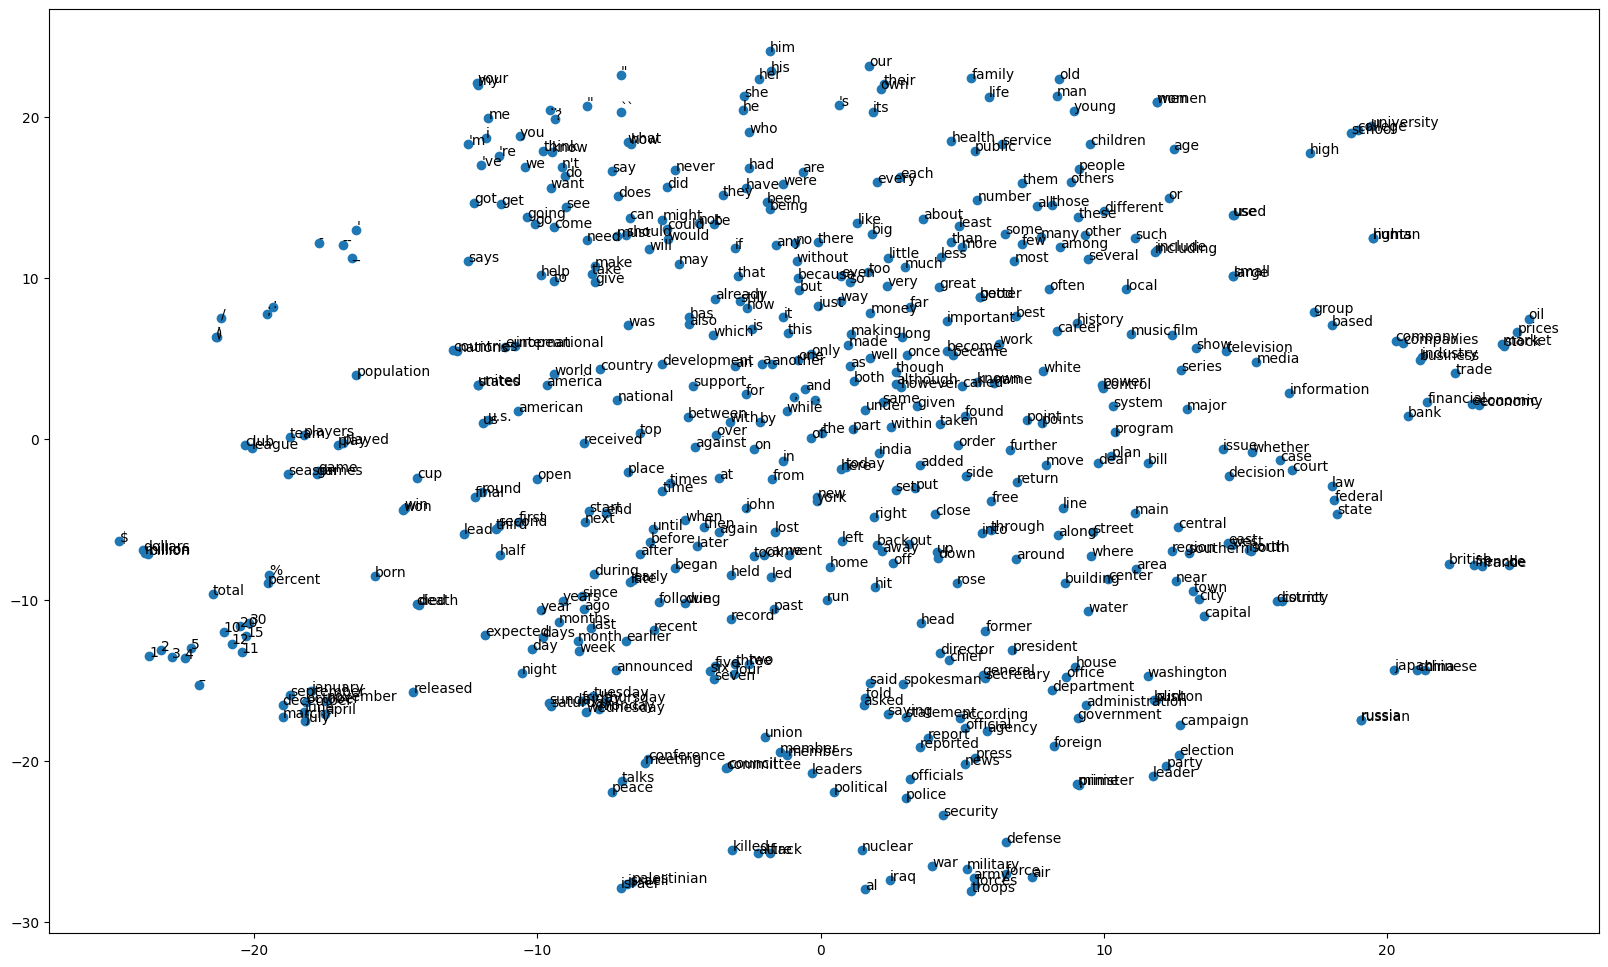

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,12))
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

In [137]:
vocabulary_size, embedding_dim

(5242, 100)

In [138]:
class RNN:
    def __init__(self, word_dim, hidden_dim=100, bptt_truncate=4):
        # Assign instance variables
        self.word_dim = word_dim
        self.hidden_dim = hidden_dim
        self.bptt_truncate = bptt_truncate

        # Randomly initialize the network parameters
        #self.U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, word_dim))
        #self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))
        self.U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, embedding_dim))
        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))
        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))

        # Set GLOVE embeddings matrix
        self.G = embedding_matrix

In [139]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    # sometimes, may want to do this first:
    #x = np.vectorize(round)(x)

    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [140]:
def forward_propagation(self, x):
    # The total number of time steps
    T = len(x)

    # During forward propagation we save all hidden states in s because need them later.
    # We add one additional element for the initial hidden, which we set to 0
    s = np.zeros((T + 1, self.hidden_dim))
    s[-1] = np.zeros(self.hidden_dim)

    # The outputs at each time step. Again, we save them for later.
    o = np.zeros((T, self.word_dim))

    # For each time step...
    for t in np.arange(T):
        # embedding of x[t]:
        e_t = self.G[x[t]]

        # Note that we are indxing U by x[t]. This is the same as multiplying U with a one-hot vector.
        #s[t] = np.tanh(self.U[:,x[t]] + self.W.dot(s[t-1]))
        s[t] = np.tanh(self.U.dot(e_t) + self.W.dot(s[t-1]))
        o[t] = softmax(self.V.dot(s[t]))

    return [o, s]

RNN.forward_propagation = forward_propagation

In [141]:
word_dim = vocabulary_size
hidden_dim = 100
embedding_dim = 100
U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, embedding_dim))
W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))
V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))
x = np.random.randint(0, high=3000, size=word_dim)
T = len(x)
s = np.zeros((T + 1, hidden_dim))
s_m1 = np.zeros(hidden_dim)
o = np.zeros((T, word_dim))
e_0 = embedding_matrix[x[0]]
s_0 = np.tanh(U.dot(e_0) + W.dot(s_m1))
print(s_0.shape, V.shape)
o_0 = softmax(V.dot(s_0))
o_0.shape, o_0

(100,) (5242, 100)


((5242,),
 array([0.00019077, 0.00019077, 0.00019077, ..., 0.00019077, 0.00019077,
        0.00019077]))

In [142]:
def predict(self, x):
    # Perform forward propagation and return index of the highest score
    o, s = self.forward_propagation(x)
    return np.argmax(o[-1], axis=1)

RNN.predict = predict

In [143]:
def predict(self, x):
    # Perform forward propagation and return index of the highest score
    o, s = self.forward_propagation(x)
    return np.argmax(o, axis=1)

RNN.predict = predict

In [144]:
print ("x:\n%s\n%s" % (" ".join([index_to_word[x] for x in X_train2[1000]]), X_train2[1000]))

x:
SENTENCE_START
[0]


In [145]:
print ("x:\n%s\n%s" % (" ".join([index_to_word[x] for x in X_train2[10000]]), X_train2[10000]))

x:
Even after all
[383, 105, 30]


In [146]:
print ("x:\n%s\n%s" % (" ".join([index_to_word[x] for x in X_train2[20000]]), X_train2[20000]))

x:
such point Minis mother would intervene imploring me
[106, 482, 1277, 47, 19, 1716, 2633, 56]


In [147]:
print ("x:\n%s\n%s" % (" ".join([index_to_word[x] for x in X_train2[30000]]), X_train2[30000]))

x:
out One two three go At the word go the log went and
[41, 174, 157, 296, 85, 120, 2, 229, 85, 2, 663, 63, 4]


In [148]:
vocabulary_size, X_train2[10000]

(5242, [383, 105, 30])

In [149]:
np.random.seed(17)
model = RNN(vocabulary_size)
o, s = model.forward_propagation(X_train2[10000])
print (o.shape, o)

(3, 5242) [[0.00019077 0.00019077 0.00019077 ... 0.00019077 0.00019077 0.00019077]
 [0.00019077 0.00019077 0.00019077 ... 0.00019077 0.00019077 0.00019077]
 [0.00018626 0.00018388 0.00018978 ... 0.00019164 0.00020165 0.00018859]]


In [150]:
o[-1]

array([0.00018626, 0.00018388, 0.00018978, ..., 0.00019164, 0.00020165,
       0.00018859])

In [151]:
np.argmax(o[-1], axis=0)

1159

In [152]:
predictions = model.predict(X_train2[10000])
print(predictions.shape, predictions)

(3,) [   0    0 1159]


In [153]:
print ("x:\n%s" % (" ".join([index_to_word[x] for x in predictions])))

x:
SENTENCE_START SENTENCE_START duty


In [154]:
def calculate_total_loss(self, x, y):
    L = 0
    # For each sentence...
    for i in np.arange(len(y)):
        o, s = self.forward_propagation(x[i])
        # We only care about our prediction of the "correct" words
        correct_word_predictions = o[np.arange(len(y[i])), y[i]]
        # Add to the loss based on how off we were
        L += -1 * np.sum(np.log(correct_word_predictions))
    return L

def calculate_loss(self, x, y):
    # Divide the total loss by the number of training examples
    N = np.sum((len(y_i) for y_i in y))
    return self.calculate_total_loss(x,y)/N

RNN.calculate_total_loss = calculate_total_loss
RNN.calculate_loss = calculate_loss

In [155]:
# Limit to 1000 examples to save time
print ("Expected Loss for random predictions: %f" % np.log(vocabulary_size))
print ("Actual loss: %f" % model.calculate_loss(X_train[:1000], y_train[:1000]))

Expected Loss for random predictions: 8.564458


/tmp/ipykernel_86/1857118698.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  N = np.sum((len(y_i) for y_i in y))


Actual loss: 8.564458


In [156]:
def bptt(self, x, y):
    T = len(y)

    # Perform forward propagation
    o, s = self.forward_propagation(x)

    # We accumulate the gradients in these variables
    dLdU = np.zeros(self.U.shape)
    dLdV = np.zeros(self.V.shape)
    dLdW = np.zeros(self.W.shape)
    delta_o = o
    delta_o[np.arange(len(y)), y] -= 1.

    # For each output backwards...
    for t in np.arange(T)[::-1]:
        dLdV += np.outer(delta_o[t], s[t].T)

        # Initial delta calculation
        delta_t = self.V.T.dot(delta_o[t]) * (1 - (s[t] ** 2))

        # Backpropagation through time (for at most self.bptt_truncate steps)
        for bptt_step in np.arange(max(0, t-self.bptt_truncate), t+1)[::-1]:

            # print "Backpropagation step t=%d bptt step=%d " % (t, bptt_step)
            dLdW += np.outer(delta_t, s[bptt_step-1])
            #dLdU[:,x[bptt_step]] += delta_t
            dLdU += np.outer(delta_t, self.G[x[bptt_step]])

            # Update delta for next step
            delta_t = self.W.T.dot(delta_t) * (1 - s[bptt_step-1] ** 2)

    return [dLdU, dLdV, dLdW]

RNN.bptt = bptt

In [157]:
def gradient_check(self, x, y, h=0.001, error_threshold=0.01):

    # Calculate the gradients using backpropagation. We want to checker if these are correct.
    bptt_gradients = model.bptt(x, y)

    # List of all parameters we want to check.
    model_parameters = ['U', 'V', 'W']

    # Gradient check for each parameter
    for pidx, pname in enumerate(model_parameters):

        # Get the actual parameter value from the mode, e.g. model.W
        parameter = operator.attrgetter(pname)(self)
        print("Performing gradient check for parameter %s with size %d." % (pname, np.prod(parameter.shape)))

        # Iterate over each element of the parameter matrix, e.g. (0,0), (0,1), ...
        it = np.nditer(parameter, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            ix = it.multi_index

            # Save the original value so we can reset it later
            original_value = parameter[ix]

            # Estimate the gradient using (f(x+h) - f(x-h))/(2*h)
            parameter[ix] = original_value + h
            gradplus = model.calculate_total_loss([x],[y])
            parameter[ix] = original_value - h
            gradminus = model.calculate_total_loss([x],[y])
            estimated_gradient = (gradplus - gradminus)/(2*h)

            # Reset parameter to original value
            parameter[ix] = original_value

            # The gradient for this parameter calculated using backpropagation
            backprop_gradient = bptt_gradients[pidx][ix]

            # calculate The relative error: (|x - y|/(|x| + |y|))
            relative_error = np.abs(backprop_gradient - estimated_gradient) / (
                                np.abs(backprop_gradient) + np.abs(estimated_gradient))

               # If the error is to large fail the gradient check
            if relative_error > error_threshold:
                print( "Gradient Check ERROR: parameter=%s ix=%s" % (pname, ix))
                print( "+h Loss: %f" % gradplus)
                print( "-h Loss: %f" % gradminus)
                print( "Estimated_gradient: %f" % estimated_gradient)
                print( "Backpropagation gradient: %f" % backprop_gradient)
                print( "Relative Error: %f" % relative_error)
                return
            it.iternext()

        print( "Gradient check for parameter %s passed." % (pname))

RNN.gradient_check = gradient_check

In [158]:
grad_check_vocab_size = 100
np.random.seed(10)
model = RNN(grad_check_vocab_size, 10, bptt_truncate=1000)
model.gradient_check([0,1,2,3], [1,2,3,4])

Performing gradient check for parameter U with size 1000.
Gradient check for parameter U passed.
Performing gradient check for parameter V with size 1000.
Gradient check for parameter V passed.
Performing gradient check for parameter W with size 100.
Gradient check for parameter W passed.


In [159]:
# Performs one step of SGD.
def numpy_sdg_step(self, x, y, learning_rate):
    # Calculate the gradients
    dLdU, dLdV, dLdW = self.bptt(x, y)

    # Change parameters according to gradients and learning rate
    self.U -= learning_rate * dLdU
    self.V -= learning_rate * dLdV
    self.W -= learning_rate * dLdW

RNN.sgd_step = numpy_sdg_step

In [160]:
# # Outer SGD Loop
# # - model: The RNN model instance
# # - X_train: The training data set
# # - y_train: The training data labels
# # - learning_rate: Initial learning rate for SGD
# # - nepoch: Number of times to iterate through the complete dataset
# # - evaluate_loss_after: Evaluate the loss after this many epochs

# def train_with_sgd(model, X_train, y_train, learning_rate=0.005, nepoch=100, evaluate_loss_after=5):
#     # We keep track of the losses so we can plot them later
#     losses = []
#     num_examples_seen = 0

#     for epoch in range(nepoch):

#         # Optionally evaluate the loss
#         if (epoch % evaluate_loss_after == 0):
#             loss = model.calculate_loss(X_train, y_train)
#             losses.append((num_examples_seen, loss))
#             time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
#             print ("%s: Loss after num_examples_seen=%d epoch=%d: %f" % (time, num_examples_seen, epoch, loss))

#             # Adjust the learning rate if loss increases
#             if (len(losses) > 1 and losses[-1][1] > losses[-2][1]):
#                 learning_rate = learning_rate * 0.5
#                 print ("Setting learning rate to %f" % learning_rate)
#             sys.stdout.flush()

#         # For each training example...
#         for i in range(len(y_train)):

#             # One SGD step
#             model.sgd_step(X_train[i], y_train[i], learning_rate)
#             num_examples_seen += 1

In [161]:
import pickle
import os
import time

def save_checkpoint(model, epoch, loss, num_examples_seen, learning_rate, checkpoint_path):

    checkpoint = {
        'epoch': epoch,
        'loss': loss,
        'num_examples_seen': num_examples_seen,
        'learning_rate': learning_rate,
        'model_state': {
            'U': model.U,
            'V': model.V,
            'W': model.W,
            'G': model.G
        }
    }
    with open(checkpoint_path, 'wb') as f:
        pickle.dump(checkpoint, f)
    print(f"Checkpoint saved to {checkpoint_path}")

In [162]:
def load_checkpoint(checkpoint_path):
    with open(checkpoint_path, 'rb') as f:
        checkpoint = pickle.load(f)
    
    model = RNN(checkpoint['model_state']['V'].shape[0], hidden_dim=checkpoint['model_state']['U'].shape[0])
    model.U = checkpoint['model_state']['U']
    model.V = checkpoint['model_state']['V']
    model.W = checkpoint['model_state']['W']
    model.G = checkpoint['model_state']['G']
    
    print(f"Loaded checkpoint from epoch {checkpoint['epoch']} with loss {checkpoint['loss']}")
    return model, checkpoint['epoch'], checkpoint['num_examples_seen'], checkpoint['learning_rate']

In [163]:
!pwd

/notebooks


In [164]:
checkpoint_dir = os.path.join(os.getcwd(), "model-checkpoints-small")

# Create the directory if it doesn't exist
os.makedirs(checkpoint_dir, exist_ok=True)

print(f"Checkpoint directory created at: {checkpoint_dir}")

Checkpoint directory created at: /notebooks/model-checkpoints-small


In [165]:
# Outer SGD Loop
# - model: The RNN model instance
# - X_train: The training data set
# - y_train: The training data labels
# - learning_rate: Initial learning rate for SGD
# - nepoch: Number of times to iterate through the complete dataset
# - evaluate_loss_after: Evaluate the loss after this many epochs

def train_with_sgd(model, X_train, y_train, learning_rate=0.005, nepoch=100, loaded_epoch_from=0, evaluate_loss_after=5, checkpoint_dir='model-checkpoints'):
    # We keep track of the losses so we can plot them later
    losses = []
    num_examples_seen = 0

    # Create checkpoint directory if it doesn't exist
    os.makedirs(checkpoint_dir, exist_ok=True)

    for epoch in range(loaded_epoch_from, nepoch):

        # Optionally evaluate the loss
        if (epoch % evaluate_loss_after == 0):
            loss = model.calculate_loss(X_train, y_train)
            losses.append((num_examples_seen, loss))
            time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            print ("%s: Loss after num_examples_seen=%d epoch=%d: %f" % (time, num_examples_seen, epoch, loss))

            # Adjust the learning rate if loss increases
            if (len(losses) > 1 and losses[-1][1] > losses[-2][1]):
                learning_rate = learning_rate * 0.5
                print ("Setting learning rate to %f" % learning_rate)

            # Save checkpoint
            checkpoint_path = os.path.join(checkpoint_dir, f"checkpoint_epoch_{epoch}_{time}.pkl")
            save_checkpoint(model, epoch, loss, num_examples_seen, learning_rate, checkpoint_path)
            
            sys.stdout.flush()

        # For each training example...
        for i in range(len(y_train)):

            # One SGD step
            model.sgd_step(X_train[i], y_train[i], learning_rate)
            num_examples_seen += 1

In [166]:
vocabulary_size

5242

In [167]:
np.random.seed(17)
model = RNN(vocabulary_size)
%timeit model.sgd_step(X_train2[10000], y_train2[10000], 0.005)

21.3 ms ± 4.04 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [168]:
X_train2[10000]

[383, 105, 30]

In [169]:
y_train[10000]

[105, 30, 170]

In [170]:
np.random.seed(17)

# Train on a small subset of the data to see what happens
model = RNN(vocabulary_size)
losses = train_with_sgd(model, X_train2[10000:10100], y_train2[10000:10100], nepoch=10, evaluate_loss_after=1, checkpoint_dir=checkpoint_dir)

2024-10-20 06:19:43: Loss after num_examples_seen=0 epoch=0: 8.562226
Checkpoint saved to /notebooks/model-checkpoints-small/checkpoint_epoch_0_2024-10-20 06:19:43.pkl


/tmp/ipykernel_86/1857118698.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  N = np.sum((len(y_i) for y_i in y))


2024-10-20 06:19:47: Loss after num_examples_seen=100 epoch=1: 8.520837
Checkpoint saved to /notebooks/model-checkpoints-small/checkpoint_epoch_1_2024-10-20 06:19:47.pkl
2024-10-20 06:19:49: Loss after num_examples_seen=200 epoch=2: 8.469626
Checkpoint saved to /notebooks/model-checkpoints-small/checkpoint_epoch_2_2024-10-20 06:19:49.pkl
2024-10-20 06:19:53: Loss after num_examples_seen=300 epoch=3: 8.394355
Checkpoint saved to /notebooks/model-checkpoints-small/checkpoint_epoch_3_2024-10-20 06:19:53.pkl
2024-10-20 06:19:55: Loss after num_examples_seen=400 epoch=4: 8.273500
Checkpoint saved to /notebooks/model-checkpoints-small/checkpoint_epoch_4_2024-10-20 06:19:55.pkl
2024-10-20 06:19:57: Loss after num_examples_seen=500 epoch=5: 8.078678
Checkpoint saved to /notebooks/model-checkpoints-small/checkpoint_epoch_5_2024-10-20 06:19:57.pkl
2024-10-20 06:19:59: Loss after num_examples_seen=600 epoch=6: 7.840609
Checkpoint saved to /notebooks/model-checkpoints-small/checkpoint_epoch_6_2024

In [171]:
len(index_to_word)

5243

In [172]:
def generate_sentence(model, senten_max_length):
    # We start the sentence with the start token
    new_sentence = [word_to_index[sentence_start_token]]

    # Repeat until we get an end token and keep our sentences to less than senten_max_length words for now
    while (not new_sentence[-1] == word_to_index[sentence_end_token]) and len(new_sentence) < senten_max_length:
        next_word_probs = model.forward_propagation(new_sentence)
        sampled_word = word_to_index[unknown_token]

        # We don't want to sample unknown words
        while sampled_word == word_to_index[unknown_token]:

            # correcting for abnormalities
            #abs_v = [-i if i <0 else i for i in next_word_probs[-1][0]]
            #nrm_v = [i/sum(abs_v) for i in abs_v]
            #abs_v = [0 if i <0 else i for i in next_word_probs[-1][0]]
            #abs_v = [0 if i <0 else i for i in next_word_probs[0][-1]]
            #nrm_v = [i/sum(abs_v) for i in abs_v]
            #samples = np.random.multinomial(1, nrm_v)
            #sampled_word = np.argmax(samples)

            # the secret sauce of creativity
            samples = np.random.multinomial(1, next_word_probs[0][-1])

            sampled_word = np.argmax(samples)

        new_sentence.append(sampled_word)

    print(new_sentence)
    sentence_str = [index_to_word[x] for x in new_sentence[1:-1]]
    #print(sentence_str)
    return sentence_str

In [173]:
sentence_end_token = "SENTENCE_END"

In [174]:
senten_max_length = 20
generate_sentence(model, senten_max_length)

[0, 3395, 924, 3298, 5112, 4125, 353, 3528, 3989, 1753, 2622, 2047, 207, 1330, 4370, 742, 3043, 754, 1808, 4475]


['borrowed',
 'allowed',
 'prolong',
 'offers',
 'kick',
 'beautiful',
 'dejection',
 'Moreover',
 'hurry',
 'towering',
 'educated',
 'am',
 'lazy',
 'attitude',
 'impression',
 'arose',
 'Oh',
 'patience']

In [175]:
num_sentences = 10
senten_min_length = 7
senten_max_length = 20

for i in range(num_sentences):
    sent = generate_sentence(model, senten_max_length)
    print (" ".join(sent))

[0, 3543, 4680, 3954, 3849, 1726, 4438, 1097, 2926, 1051, 4388, 3171, 4084, 1651, 1920, 5017, 912, 2480, 4935, 1093]
traversing abide society unhealthiness intimacy obey pouring plumb-line held deserts thumping hindrance nodded whose owe dragged considered alive
[0, 4419, 298, 4298, 3192, 3602, 3294, 1848, 1502, 1818, 199, 1485, 1544, 4497, 4063, 2570, 404, 3871, 127, 4877]
furiously place misunderstanding boarder noontide romances occupied announced immense seemed effect scolded trade feeble bribery part inscrutable your
[0, 2952, 2110, 2493, 2101, 1889, 2845, 4211, 4411, 4183, 4183, 2254, 3774, 1724, 2647, 1696, 4363, 5219, 3225, 5167]
unerring elsewhere delicate exchange rate indecent accused protest permanent permanent Did meeting-place persisted urged inquiries items Hitherto magisterial
[0, 4407, 4670, 3166, 2201, 2113, 3171, 2033, 517, 5123, 3284, 1012, 2083, 1891, 2019, 1432, 3398, 2805, 429, 2920]
fraction tickets resentment murmur barrister thumping greeting five doubtful unw

In [176]:
checkpoint_dir = os.path.join(os.getcwd(), "model-checkpoints")

# Create the directory if it doesn't exist
os.makedirs(checkpoint_dir, exist_ok=True)

print(f"Checkpoint directory created at: {checkpoint_dir}")

Checkpoint directory created at: /notebooks/model-checkpoints


In [530]:
model, checkpoint_epoch, checkpoint_num_examples_seen, checkpoint_learning_rate =  load_checkpoint('/Users/snehashislenka/Documents/NEU Assignments/Neural Network/Asg 5/model-checkpoints/checkpoint_epoch_10_2024-10-19 13:32:48.pkl')
print(checkpoint_epoch, checkpoint_num_examples_seen, checkpoint_learning_rate)

Loaded checkpoint from epoch 10 with loss 2.460263661466528
10 489820 0.000625


In [ ]:
np.random.seed(17)

# Training with 50 epochs on whole dataset
model = RNN(vocabulary_size)
losses = train_with_sgd(model, X_train2, y_train2, nepoch=150, loaded_epoch_from=0, evaluate_loss_after=1, checkpoint_dir=checkpoint_dir)

/tmp/ipykernel_86/1857118698.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  N = np.sum((len(y_i) for y_i in y))


2024-10-20 06:23:23: Loss after num_examples_seen=0 epoch=0: 8.564379
Checkpoint saved to /notebooks/model-checkpoints/checkpoint_epoch_0_2024-10-20 06:23:23.pkl
2024-10-20 07:15:37: Loss after num_examples_seen=48982 epoch=1: 5.502471
Checkpoint saved to /notebooks/model-checkpoints/checkpoint_epoch_1_2024-10-20 07:15:37.pkl
2024-10-20 08:06:31: Loss after num_examples_seen=97964 epoch=2: 5.432825
Checkpoint saved to /notebooks/model-checkpoints/checkpoint_epoch_2_2024-10-20 08:06:31.pkl
2024-10-20 08:57:10: Loss after num_examples_seen=146946 epoch=3: 5.321730
Checkpoint saved to /notebooks/model-checkpoints/checkpoint_epoch_3_2024-10-20 08:57:10.pkl
2024-10-20 09:48:42: Loss after num_examples_seen=195928 epoch=4: 5.379831
Setting learning rate to 0.002500
Checkpoint saved to /notebooks/model-checkpoints/checkpoint_epoch_4_2024-10-20 09:48:42.pkl
2024-10-20 10:40:31: Loss after num_examples_seen=244910 epoch=5: 5.190125
Checkpoint saved to /notebooks/model-checkpoints/checkpoint_epo

In [298]:
def generate_sentence(model, senten_max_length):
    # We start the sentence with the start token
    new_sentence = [word_to_index[sentence_start_token]]

    # Repeat until we get an end token and keep our sentences to less than senten_max_length words for now
    while (not new_sentence[-1] == word_to_index[sentence_end_token]) and len(new_sentence) < senten_max_length:
        next_words_probs = model.forward_propagation(new_sentence)
        sampled_word = word_to_index[unknown_token]

        # We don't want to sample unknown words
        while sampled_word == word_to_index[unknown_token]:

            #print(next_word_probs[0][-1])
            samples = np.random.multinomial(1, next_words_probs[0][-1])
            sampled_word = np.argmax(samples)

        new_sentence.append(sampled_word)

    #print(new_sentence)
    sentence_str = [index_to_word[x] for x in new_sentence[1:-1]]
    #print(sentence_str)
    return sentence_str

In [321]:
num_sentences = 50
senten_min_length = 7
senten_max_length = 20

print("Model Generated sentences: ")

for i in range(num_sentences):
    sent = []
    # We want long sentences, not sentences with one or two words
    while len(sent) < senten_min_length:
        sent = generate_sentence(model, senten_max_length)
    print (" ".join(sent))

Model Generated sentences: 
absent-minded seconded bought conspiring show closely toddle grew soft coal practical squalid special rather adopted Dadas _mohurs_ promised
paying Women walks trembling sandal-wood attention luxury bribery fish-curry dreading lunacy cash December seems polished absent-minded piece emperor
tunic entreaty Sahib exposed generosity scientific quaint thinks Euclid pray burdens withered bare-faced answers join inside money-lenders swim
jewels Holidays asked anticipation embrace sleep At assured missing leant lock disappointment class seventeenth innumerable stricken avenge excited
bet higher peaks jealous coin amusing worldly lean assault plates unjust spot quickly up of muttering table raisins
unmercifully goddess immature height examiners utter his children coaxed Now difficulty unconcerned whole take on their to come
maidens laid innocent ease proofs perforce carefully overwhelming wait bedside hugely gust bend crept refinement shivering She loose
uniformity b

In [323]:
# We start the sentence with the start token
new_sentence = [word_to_index[sentence_start_token]]
new_sentence

[0]

In [324]:
print("Generating sentence:")
print(f"Start: {sentence_start_token}")

Generating sentence:
Start: SENTENCE_START


In [325]:
word_to_index[sentence_end_token]

1

In [326]:
senten_max_length

20

In [ ]:
while (new_sentence[-1] != word_to_index[sentence_end_token]) and (len(new_sentence) < senten_max_length):
    next_word_probs = model.forward_propagation(new_sentence)
    print(next_word_probs)

In [316]:
import numpy as np

# We start the sentence with the start token
new_sentence = [word_to_index[sentence_start_token]]

print("Generating sentence:")
print(f"Start: {sentence_start_token}")

# Repeat until we get an end token and keep our sentences to less than senten_max_length words for now
while (new_sentence[-1] != word_to_index[sentence_end_token]) and len(new_sentence) < senten_max_length:
    next_word_probs = model.forward_propagation(new_sentence)
    
    # Get the probabilities for the next word
    word_probs = next_word_probs[0][0]  # Assuming this is the correct shape
    
    # Sort probabilities in descending order
    sorted_indices = np.argsort(word_probs)[::-1]
    
    # Select the most probable word that isn't unknown
    for idx in sorted_indices:
        if idx != word_to_index[unknown_token]:
            sampled_word = idx
            break
    
    current_sentence = " ".join([index_to_word[x] for x in new_sentence])
    next_word = index_to_word[sampled_word]
    print(f"Current: {current_sentence} ---> Next: {next_word}")
    
    new_sentence.append(sampled_word)

# Generate the final sentence
sentence_str = [index_to_word[x] for x in new_sentence[1:-1]]  # Exclude start and end tokens
final_sentence = " ".join(sentence_str)

print("\nGenerated sentence:")
print(final_sentence)

Generating sentence:
Start: SENTENCE_START
Current: SENTENCE_START ---> Next: belongs
Current: SENTENCE_START belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs belongs belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs belongs belongs belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs belongs belongs belongs belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs belongs belongs belongs belongs belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belo

In [317]:
import numpy as np

# We start the sentence with the start token
new_sentence = [word_to_index[sentence_start_token]]

print("Generating sentence:")
print(f"Start: {sentence_start_token}")

# Repeat until we get an end token and keep our sentences to less than senten_max_length words for now
while (new_sentence[-1] != word_to_index[sentence_end_token]) and len(new_sentence) < senten_max_length:
    next_word_probs, _ = model.forward_propagation(new_sentence)
    
    # Get the probabilities for the next word (last time step)
    word_probs = next_word_probs[-1]
    
    # Sort probabilities in descending order
    sorted_indices = np.argsort(word_probs)[::-1]
    
    # Select the most probable word that isn't unknown
    for idx in sorted_indices:
        if idx != word_to_index[unknown_token]:
            sampled_word = idx
            break
    
    current_sentence = " ".join([index_to_word[x] for x in new_sentence])
    next_word = index_to_word[sampled_word]
    print(f"Current: {current_sentence} ---> Next: {next_word}")
    
    new_sentence.append(sampled_word)

# Generate the final sentence
sentence_str = [index_to_word[x] for x in new_sentence[1:-1]]  # Exclude start and end tokens
final_sentence = " ".join(sentence_str)

print("\nGenerated sentence:")
print(final_sentence)

Generating sentence:
Start: SENTENCE_START
Current: SENTENCE_START ---> Next: belongs
Current: SENTENCE_START belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs belongs belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs belongs belongs belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs belongs belongs belongs belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs belongs belongs belongs belongs belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belo

In [320]:
# # We start the sentence with the start token
# new_sentence = [word_to_index[sentence_start_token]]

# # Repeat until we get an end token and keep our sentences to less than senten_max_length words for now
# while (not new_sentence[-1] == word_to_index[sentence_end_token]) and len(new_sentence) < senten_max_length:
#     next_word_probs = model.forward_propagation(new_sentence)
#     sampled_word = word_to_index[unknown_token]

#     # We don't want to sample unknown words
#     while sampled_word == word_to_index[unknown_token]:

#         #print(next_word_probs[0][-1])
#         #samples = np.random.multinomial(1, next_word_probs[0][-1])
#         sampled_word = np.argmax(next_word_probs[0][-1])
#         print(new_sentence, [index_to_word[x] for x in new_sentence], "--->", sampled_word, index_to_word[sampled_word])

#     new_sentence.append(sampled_word)

# #print(new_sentence)
# sentence_str = [index_to_word[x] for x in new_sentence[1:-1]]

In [301]:
word_to_index[sentence_start_token], word_to_index[sentence_end_token], word_to_index[unknown_token]

(0, 1, 5242)

Generating sentence:
Start: SENTENCE_START
Current: SENTENCE_START ---> Next: belongs
Current: SENTENCE_START belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs belongs belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs belongs belongs belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs belongs belongs belongs belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belongs belongs belongs belongs belongs belongs belongs belongs ---> Next: belongs
Current: SENTENCE_START belongs belongs belo

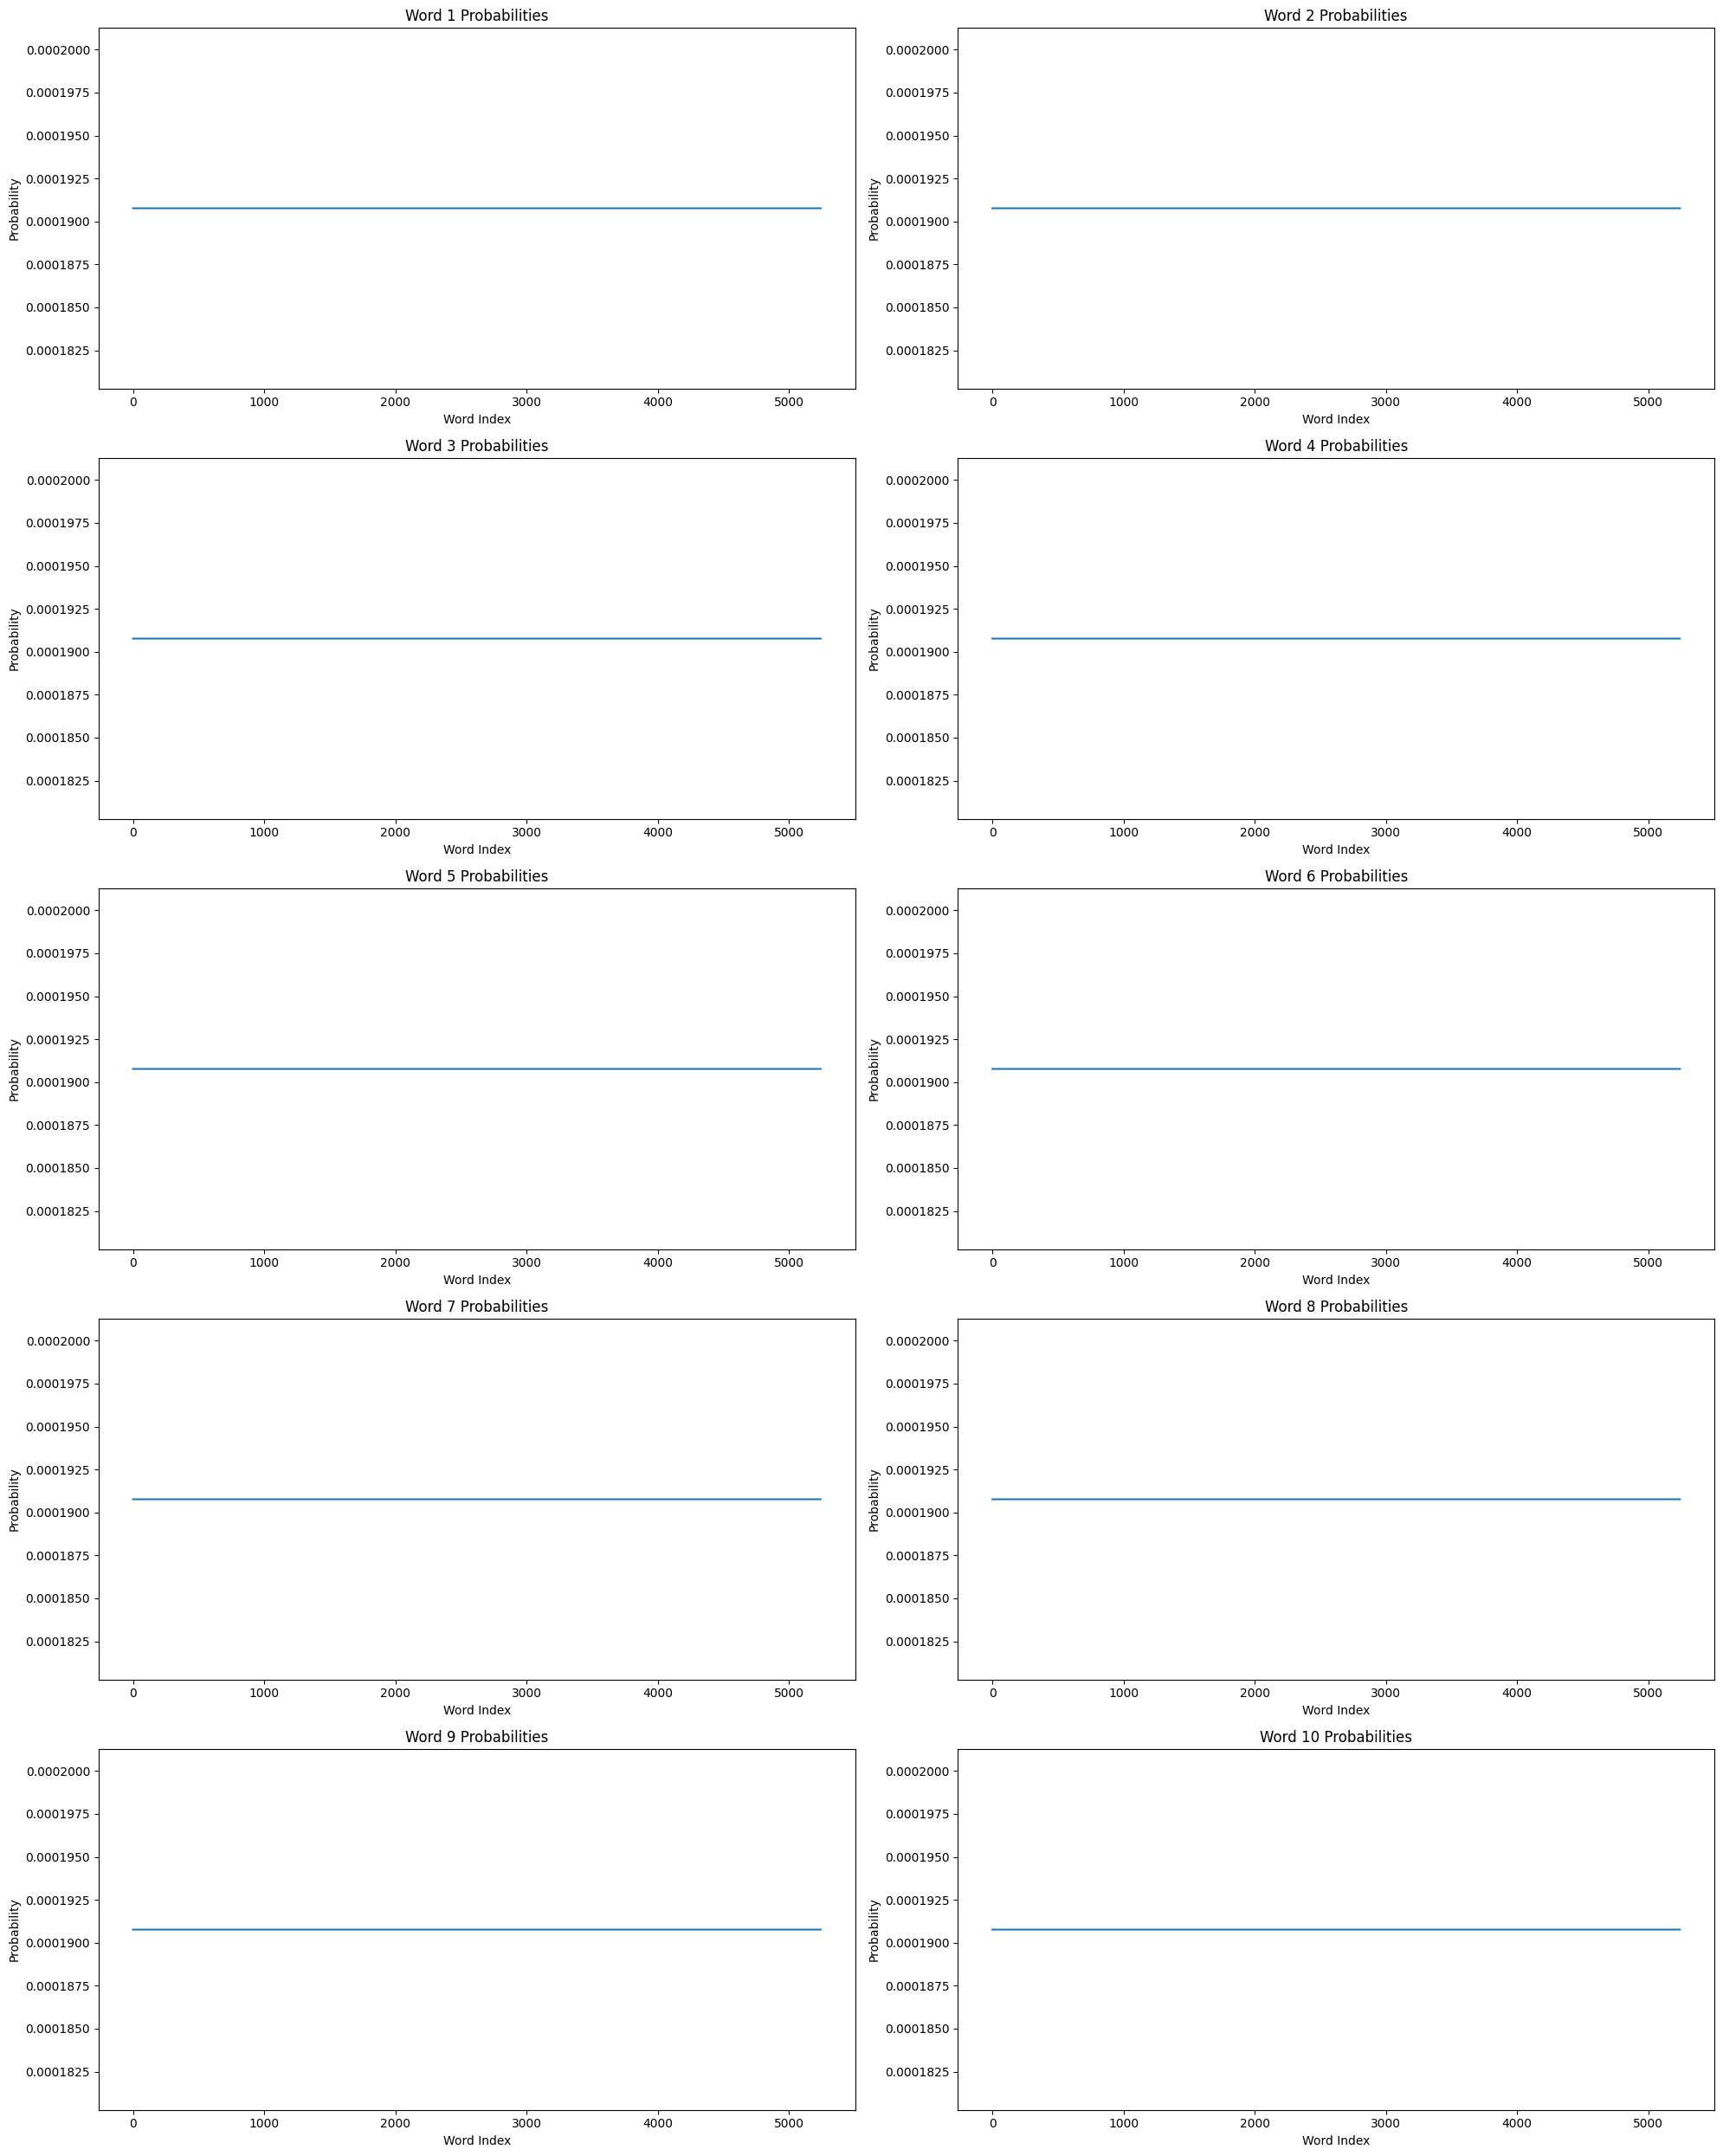


Generated sentence:
belongs belongs belongs belongs belongs belongs belongs belongs belongs belongs belongs belongs belongs belongs belongs belongs belongs belongs


In [319]:
import numpy as np
import matplotlib.pyplot as plt

# We start the sentence with the start token
new_sentence = [word_to_index[sentence_start_token]]

print("Generating sentence:")
print(f"Start: {sentence_start_token}")

# Set up the plot
fig, ax = plt.subplots(5, 2, figsize=(20, 25))
plot_count = 0

# Repeat until we get an end token and keep our sentences to less than senten_max_length words for now
while (new_sentence[-1] != word_to_index[sentence_end_token]) and len(new_sentence) < senten_max_length:
    next_word_probs, _ = model.forward_propagation(new_sentence)
    
    # Get the probabilities for the next word (last time step)
    word_probs = next_word_probs[-1]
    
    # Plotting
    if plot_count < 10:
        row = plot_count // 2
        col = plot_count % 2
        ax[row, col].plot(word_probs)
        ax[row, col].set_title(f"Word {len(new_sentence)} Probabilities")
        ax[row, col].set_xlabel("Word Index")
        ax[row, col].set_ylabel("Probability")
        plot_count += 1
    
    # Sort probabilities in descending order
    sorted_indices = np.argsort(word_probs)[::-1]
    
    # Select the most probable word that isn't unknown
    for idx in sorted_indices:
        if idx != word_to_index[unknown_token]:
            sampled_word = idx
            break
    
    current_sentence = " ".join([index_to_word[x] for x in new_sentence])
    next_word = index_to_word[sampled_word]
    print(f"Current: {current_sentence} ---> Next: {next_word}")
    
    new_sentence.append(sampled_word)

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

# Generate the final sentence
sentence_str = [index_to_word[x] for x in new_sentence[1:-1]]  # Exclude start and end tokens
final_sentence = " ".join(sentence_str)

print("\nGenerated sentence:")
print(final_sentence)

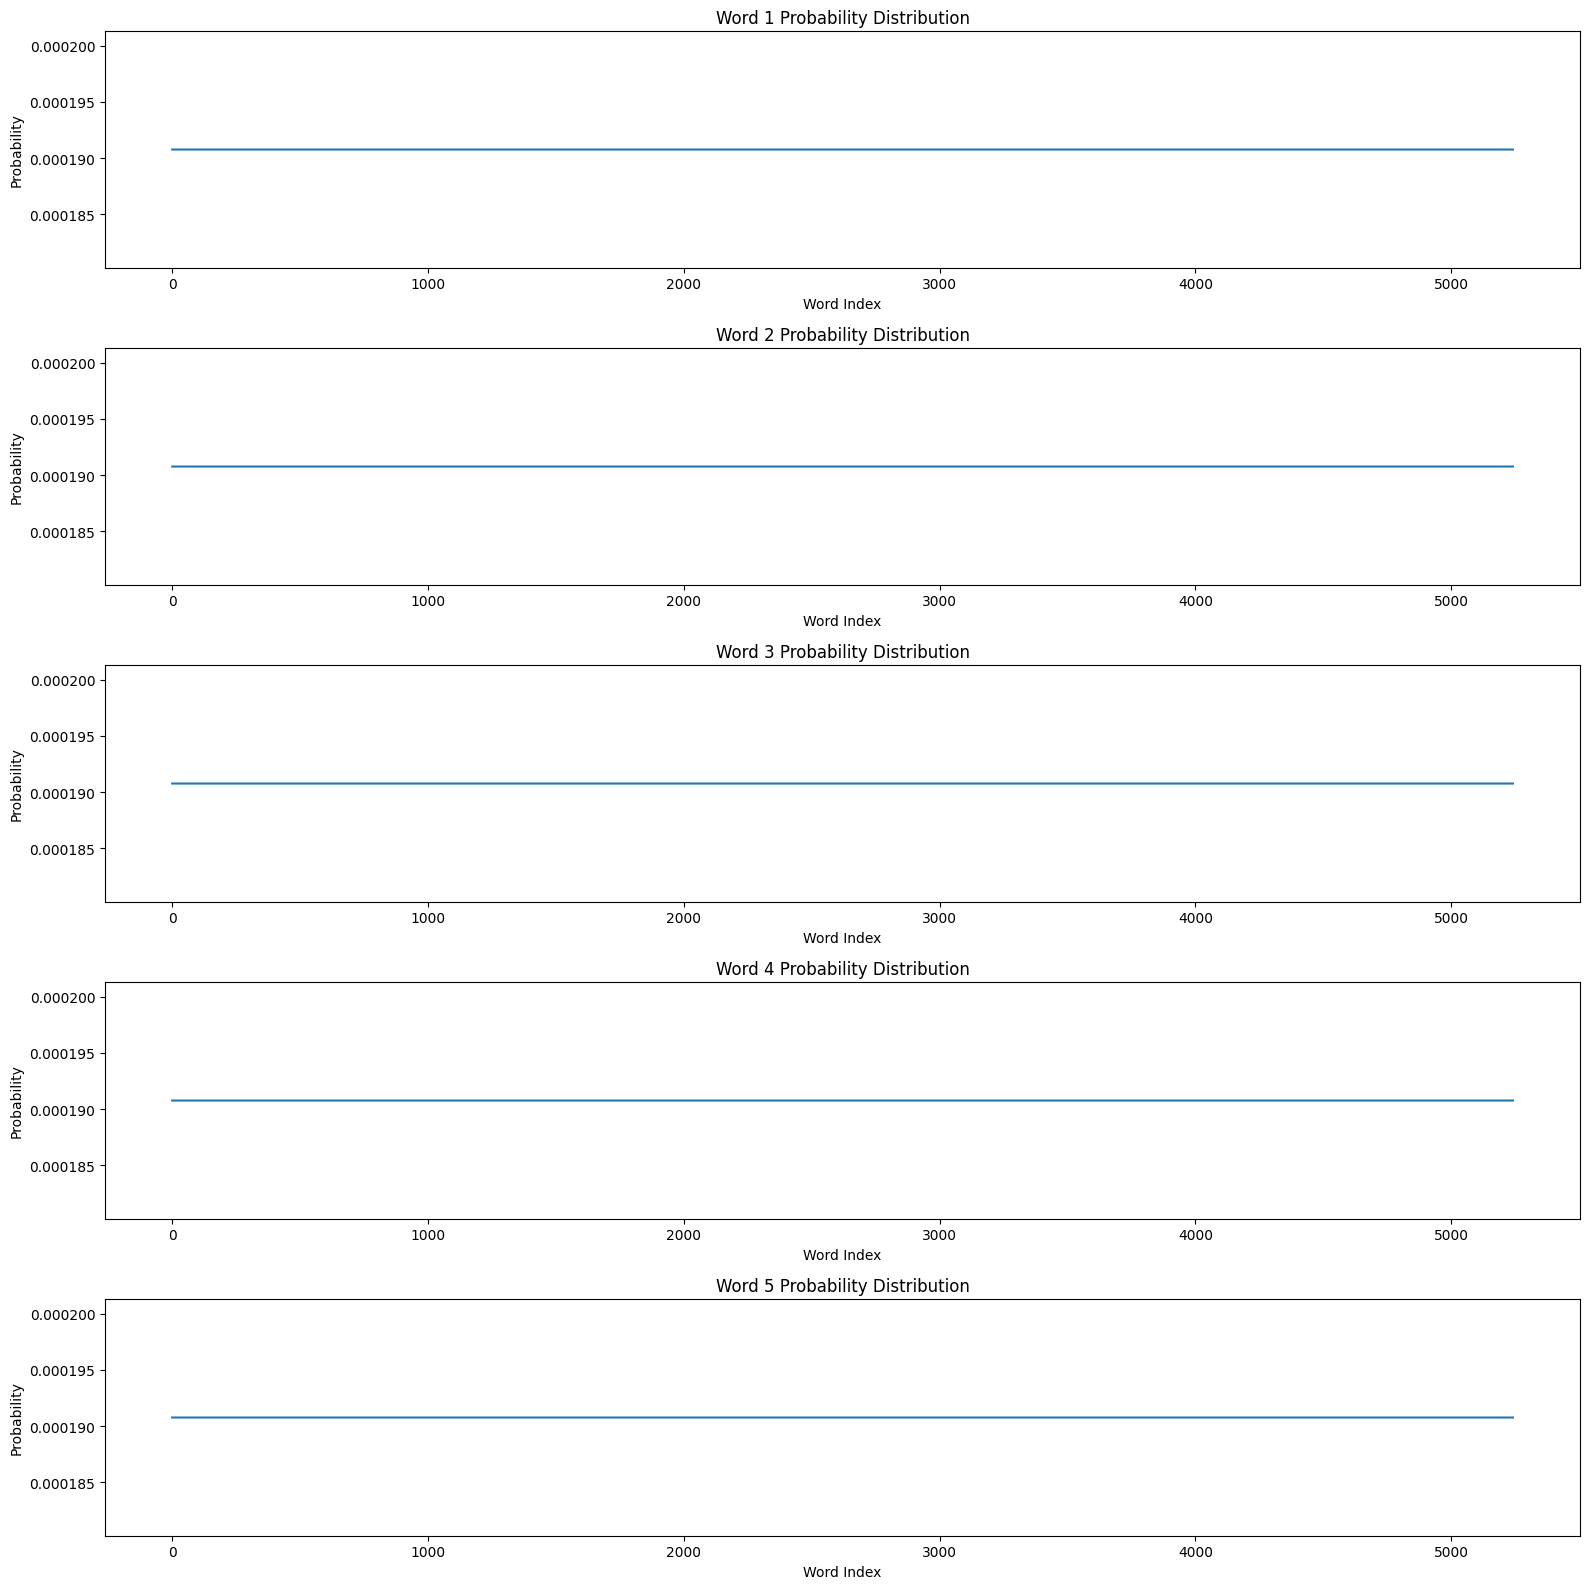

SENTENCE_START SENTENCE_START SENTENCE_START SENTENCE_START


In [318]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(5, 1, figsize=(16, 16))

new_sentence = [word_to_index[sentence_start_token]]
i = 0

while (not new_sentence[-1] == word_to_index[sentence_end_token]) and len(new_sentence) < senten_max_length:
    next_word_probs = model.forward_propagation(new_sentence)

    sampled_word = word_to_index[unknown_token]

    while sampled_word == word_to_index[unknown_token]:
        if i < 5:  # Only plot for the first 5 iterations
            ax[i].plot(next_word_probs[0][0])  # Plot the entire probability distribution
            ax[i].set_title(f"Word {i+1} Probability Distribution")
            ax[i].set_xlabel("Word Index")
            ax[i].set_ylabel("Probability")
        i += 1
        sampled_word = np.argmax(next_word_probs[0][0])  # Get the index of the most probable word

    new_sentence.append(sampled_word)

    if i >= 5:  # Break after 5 iterations to avoid infinite loop
        break

plt.tight_layout()
plt.show()

sentence_str = [index_to_word[x] for x in new_sentence[1:-1]]
print(" ".join(sentence_str))

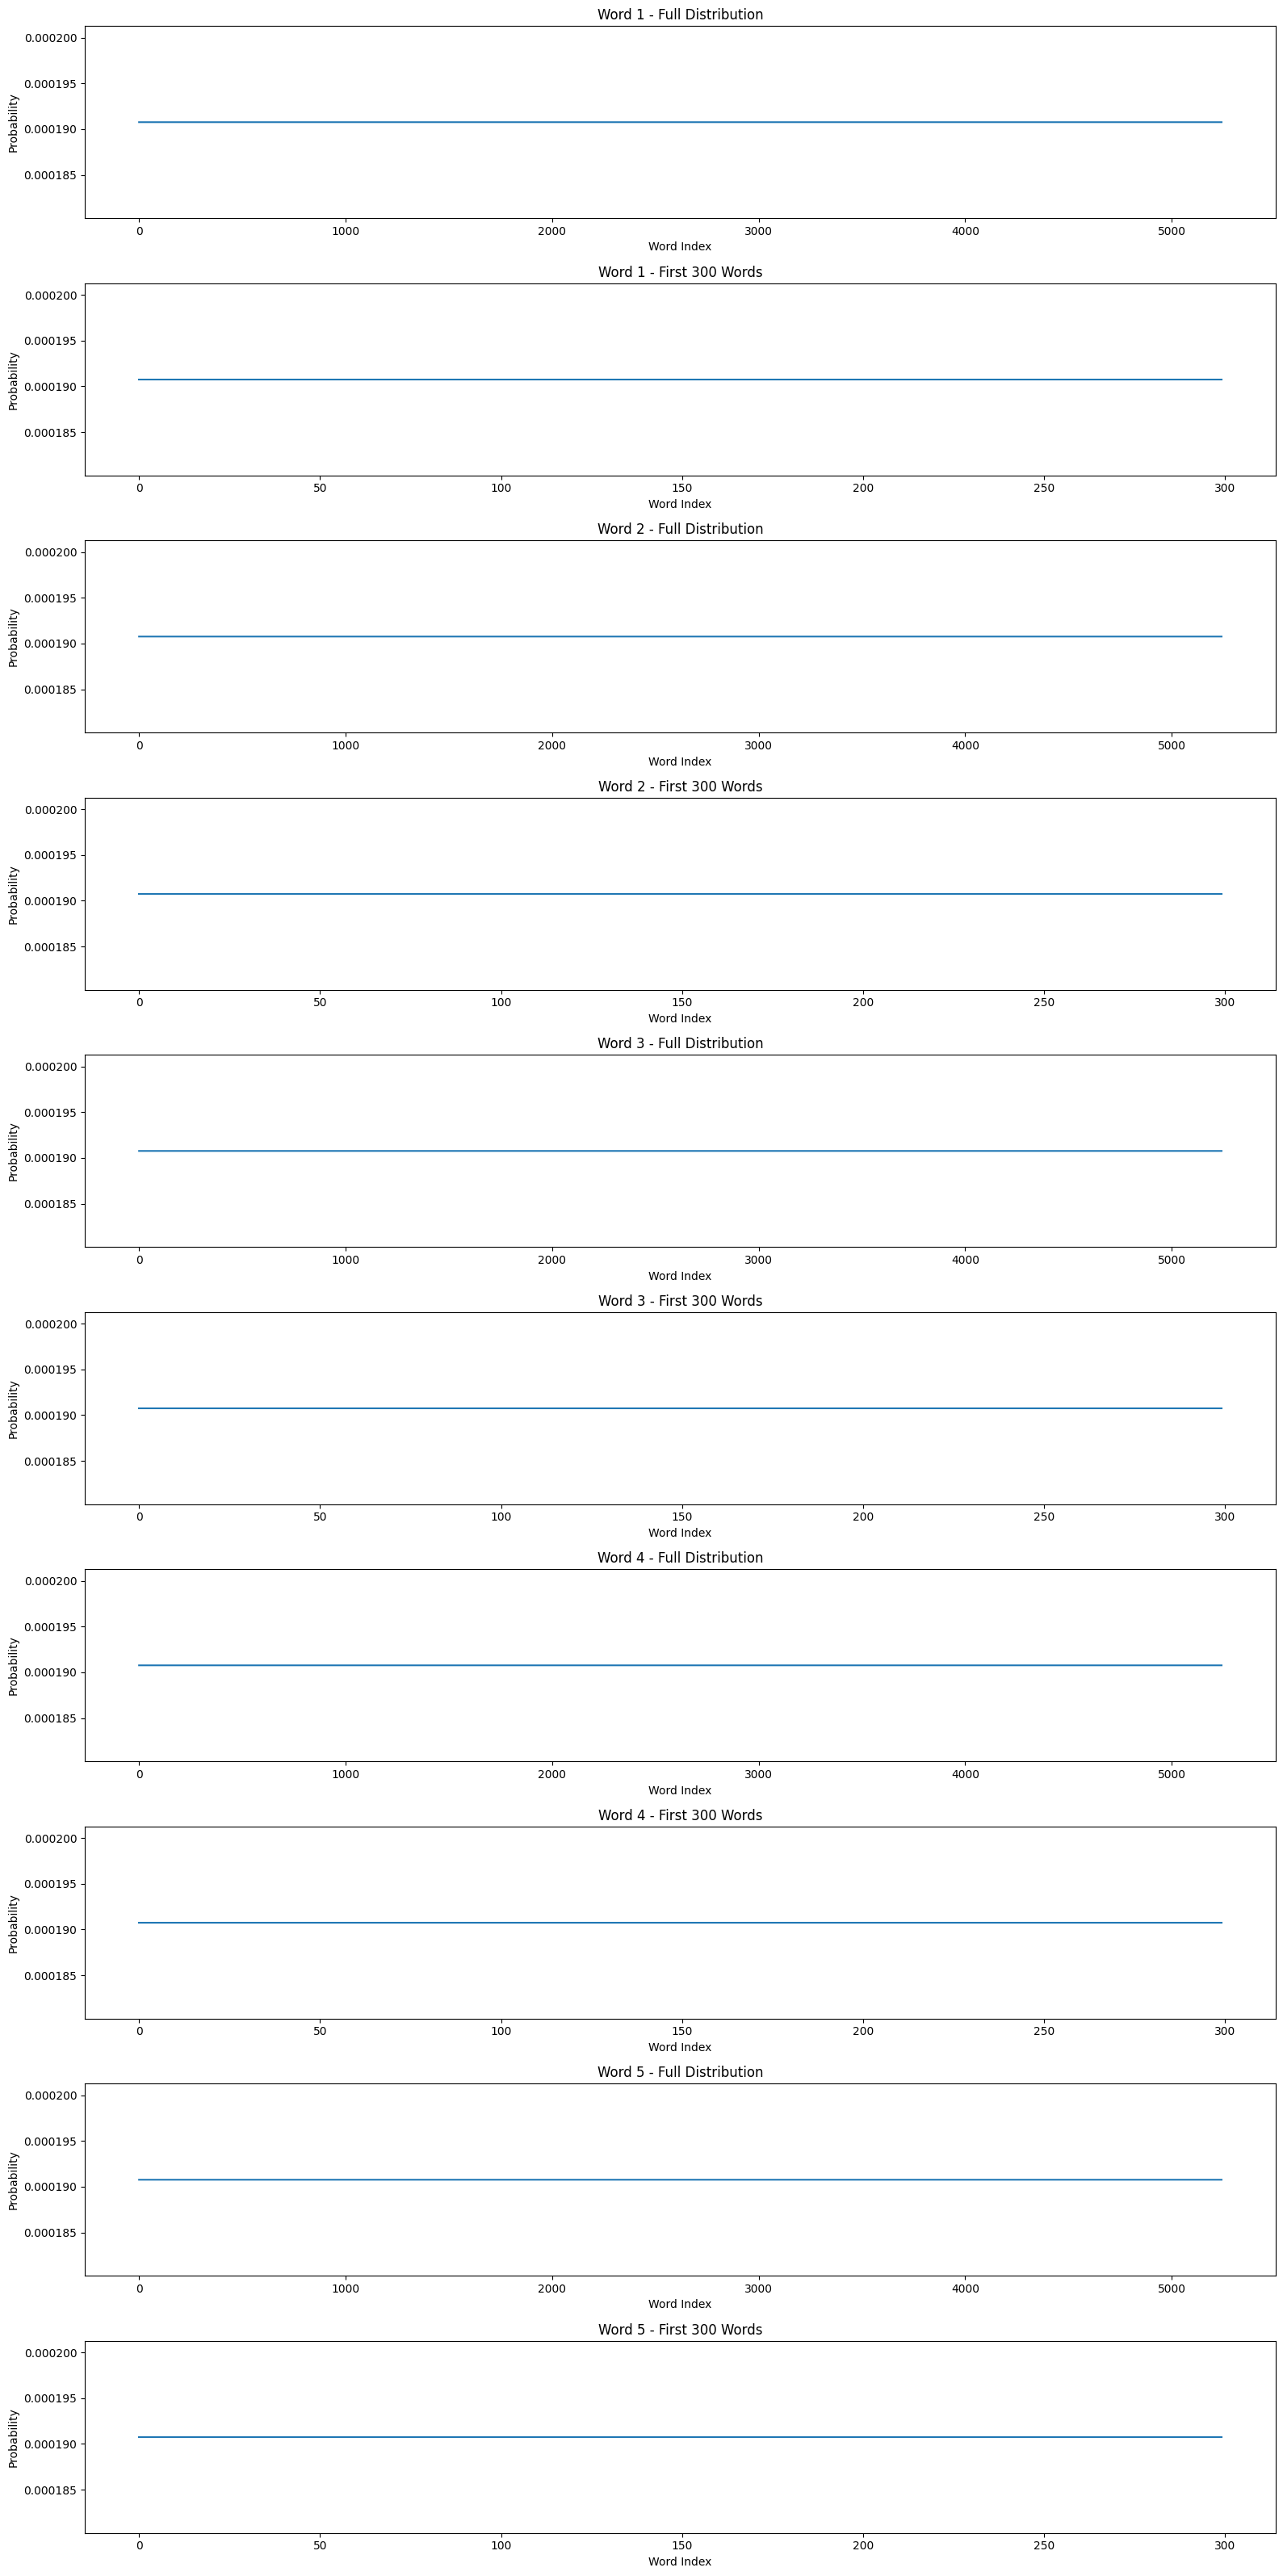

Generated sentence: SENTENCE_START SENTENCE_START SENTENCE_START SENTENCE_START


In [314]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(10, 1, figsize=(16, 32))

# We start the sentence with the start token
new_sentence = [word_to_index[sentence_start_token]]
i = 0

# Repeat until we get an end token and keep our sentences to less than senten_max_length words for now
while (not new_sentence[-1] == word_to_index[sentence_end_token]) and len(new_sentence) < senten_max_length:
    next_word_probs = model.forward_propagation(new_sentence)
    sampled_word = word_to_index[unknown_token]

    # We don't want to sample unknown words
    while sampled_word == word_to_index[unknown_token]:
        if i < 10:  # We have 10 subplots
            probs = next_word_probs[0][0]  # Assuming this is the correct shape
            
            # Full distribution plot
            ax[i].plot(probs)
            ax[i].set_title(f"Word {len(new_sentence)} - Full Distribution")
            ax[i].set_xlabel("Word Index")
            ax[i].set_ylabel("Probability")
            
            # Zoomed-in plot (first 300 elements)
            ax[i+1].plot(probs[:300])
            ax[i+1].set_title(f"Word {len(new_sentence)} - First 300 Words")
            ax[i+1].set_xlabel("Word Index")
            ax[i+1].set_ylabel("Probability")
            
            i += 2
        
        sampled_word = np.argmax(probs)

    new_sentence.append(sampled_word)
    
    if i >= 10:  # Break after 5 words (10 plots)
        break

plt.tight_layout()
plt.show()

sentence_str = [index_to_word[x] for x in new_sentence[1:-1]]
print("Generated sentence:", " ".join(sentence_str))